In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
column_names = ['id','clean_name_intersect_min','clean_name_intersect_max','clean_name_levenshtein_sim','clean_name_trigram_sim',
                'clean_name_levenshtein_term',
                'clean_name_trigram_term','clean_name_including','clean_name_equality','city_intersect_min','city_intersect_max',
                'city_levenshtein_sim','city_trigram_sim','city_levenshtein_term','city_trigram_term','city_including','city_equality'
                ,'zip_intersect_min','zip_intersect_max','zip_levenshtein_sim','zip_trigram_sim','zip_levenshtein_term',
                'zip_trigram_term','zip_including','zip_equality',
                'street_intersect_min','street_intersect_max','street_levenshtein_sim','street_trigram_sim','street_levenshtein_term',
                'street_trigram_term'
                ,'street_including','street_equality','website_intersect_min','website_intersect_max','website_levenshtein_sim','website_trigram_sim',
                'website_levenshtein_term','website_trigram_term','website_including','website_equality','countryname_intersect_min','countryname_intersect_max',
                'countryname_levenshtein_sim','countryname_trigram_sim','countryname_levenshtein_term',
                'countryname_trigram_term','countryname_including','countryname_equality','geocoderlocalityname_intersect_min','geocoderlocalityname_intersect_max',
                'geocoderlocalityname_levenshtein_sim','geocoderlocalityname_trigram_sim','geocoderlocalityname_levenshtein_term','geocoderlocalityname_trigram_term',
                'geocoderlocalityname_including','geocoderlocalityname_equality','geocoderinputaddress_intersect_min','geocoderinputaddress_intersect_max',
                'geocoderinputaddress_levenshtein_sim','geocoderinputaddress_trigram_sim','geocoderinputaddress_levenshtein_term','geocoderinputaddress_trigram_term',
                'geocoderinputaddress_including','geocoderinputaddress_equality','geocoderoutputaddress_intersect_min','geocoderoutputaddress_intersect_max',
                'geocoderoutputaddress_levenshtein_sim','geocoderoutputaddress_trigram_sim','geocoderoutputaddress_levenshtein_term','geocoderoutputaddress_trigram_term',
                'geocoderoutputaddress_including','geocoderoutputaddress_equality','geocoderpostalcodenumber_intersect_min','geocoderpostalcodenumber_intersect_max',
                'geocoderpostalcodenumber_levenshtein_sim','geocoderpostalcodenumber_trigram_sim','geocoderpostalcodenumber_levenshtein_term','geocoderpostalcodenumber_trigram_term',
                'geocoderpostalcodenumber_including','geocoderpostalcodenumber_equality','geocodercountrynamecode_intersect_min','geocodercountrynamecode_intersect_max',
                'geocodercountrynamecode_levenshtein_sim','geocodercountrynamecode_trigram_sim','geocodercountrynamecode_levenshtein_term','geocodercountrynamecode_trigram_term',
                'geocodercountrynamecode_including','geocodercountrynamecode_equality','phone_diff','phone_levenshtein','phone_trigram','phone_equality','fax_diff','fax_levenshtein',
                'fax_trigram','fax_equality','street_number_diff','street_number_levenshtein','street_number_trigram','street_number_equality','geocode_coordinates_long_diff',
                'geocode_coordinates_long_levenshtein','geocode_coordinates_long_trigram','geocode_coordinates_long_equality','geocode_coordinates_lat_diff',
                'geocode_coordinates_lat_levenshtein','geocode_coordinates_lat_trigram',
                'geocode_coordinates_lat_equality','coordinates_long_diff','coordinates_long_levenshtein','coordinates_long_trigram',
                'coordinates_long_equality','coordinates_lat_diff','coordinates_lat_levenshtein','coordinates_lat_trigram',
                'coordinates_lat_equality','geocode_coordinates_diff','coordinates_diff','label']

In [3]:
data = pd.read_csv('Nomao.data',names=column_names, na_values='?')
data

,id,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,...,0.750000,0.500000,n,0.999953,0.777778,0.461538,n,1.000000,1.000000,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,NaN,...,0.500000,0.307692,n,0.999983,0.538462,0.437500,n,1.000000,1.000000,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,...,0.666667,0.461538,n,0.999993,0.800000,0.666667,n,1.000000,1.000000,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1.0,...,0.500000,0.285714,n,0.998605,0.555556,0.384615,n,1.000000,0.999994,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0.0,...,0.222222,0.190476,n,0.999685,0.722222,0.272727,n,0.999997,0.999996,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1.0,...,0.777778,0.300000,n,0.999745,0.388889,0.333333,n,1.000000,1.000000,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.000000,NaN,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,0.999131,NaN,1


In [4]:
length_data = len(data)
num_attributes = len(data.columns)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34465 entries, 0 to 34464
Columns: 120 entries, id to label
dtypes: float64(89), int64(1), object(30)
memory usage: 31.6+ MB


In [6]:
data.describe()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,city_intersect_min,city_intersect_max,city_levenshtein_sim,city_trigram_sim,...,geocode_coordinates_lat_trigram,coordinates_long_diff,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,geocode_coordinates_diff,coordinates_diff,label
count,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,12170.000000,12170.000000,12170.000000,12170.000000,...,34459.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,34459.000000,15500.000000,34465.000000
mean,0.636477,0.494806,0.626273,0.560947,0.534202,0.506693,0.860946,0.821590,0.883386,0.854119,...,0.628865,0.978679,0.607880,0.396168,0.982576,0.644336,0.438054,0.988839,0.979322,0.428754
std,0.424382,0.380142,0.305667,0.369695,0.325744,0.372908,0.342987,0.353674,0.251547,0.305036,...,0.346063,0.104504,0.205301,0.256706,0.096650,0.184702,0.232979,0.086647,0.126150,0.903434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.008755,0.000000,0.000000,0.020058,0.000000,0.000000,0.000064,0.000077,-1.000000
25%,0.000000,0.000000,0.361111,0.218750,0.240000,0.139535,1.000000,1.000000,1.000000,1.000000,...,0.294118,0.996377,0.461538,0.214286,0.997386,0.538462,0.277778,0.999992,0.999966,-1.000000
50%,1.000000,0.500000,0.666667,0.666667,0.473684,0.478261,1.000000,1.000000,1.000000,1.000000,...,0.466667,0.999680,0.571429,0.307692,0.999804,0.625000,0.384615,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.999976,0.750000,0.461538,0.999980,0.777778,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
num_missing_values = data.isna().sum()
num_missing_values

id                                0
clean_name_intersect_min          0
clean_name_intersect_max          0
clean_name_levenshtein_sim        0
clean_name_trigram_sim            0
                              ...  
coordinates_lat_trigram       18965
coordinates_lat_equality          0
geocode_coordinates_diff          6
coordinates_diff              18965
label                             0
Length: 120, dtype: int64

Removing columns which have more 10% of data missing as for imputing more 10% of data introduces bias in the data.

In [8]:
tolerance = 0.1
removed_cols = []

for i in range(num_attributes):
  if(num_missing_values[i]/length_data > tolerance):
    removed_cols.append(data.columns[i])

new_data = data.drop(axis=1, columns=removed_cols)
print(removed_cols)
new_data

['city_intersect_min', 'city_intersect_max', 'city_levenshtein_sim', 'city_trigram_sim', 'city_levenshtein_term', 'city_trigram_term', 'zip_intersect_min', 'zip_intersect_max', 'zip_levenshtein_sim', 'zip_trigram_sim', 'zip_levenshtein_term', 'zip_trigram_term', 'street_intersect_min', 'street_intersect_max', 'street_levenshtein_sim', 'street_trigram_sim', 'street_levenshtein_term', 'street_trigram_term', 'website_intersect_min', 'website_intersect_max', 'website_levenshtein_sim', 'website_trigram_sim', 'website_levenshtein_term', 'website_trigram_term', 'countryname_intersect_min', 'countryname_intersect_max', 'countryname_levenshtein_sim', 'countryname_trigram_sim', 'countryname_levenshtein_term', 'countryname_trigram_term', 'geocoderpostalcodenumber_intersect_min', 'geocoderpostalcodenumber_intersect_max', 'geocoderpostalcodenumber_levenshtein_sim', 'geocoderpostalcodenumber_trigram_sim', 'geocoderpostalcodenumber_levenshtein_term', 'geocoderpostalcodenumber_trigram_term', 'phone_di

C:\Users\ANJALI\AppData\Local\Temp\ipykernel_7792\3667137036.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(num_missing_values[i]/length_data > tolerance):


,id,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,...,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff,label
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,s,...,0.333333,n,0.999962,0.500000,0.294118,n,n,n,1.000000,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,m,...,1.000000,s,1.000000,1.000000,1.000000,s,m,m,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,n,...,0.173913,n,0.999826,0.277778,0.200000,n,n,n,0.999997,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,s,...,0.217391,n,0.999747,0.333333,0.260870,n,n,n,1.000000,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,m,...,1.000000,s,1.000000,1.000000,1.000000,s,m,m,1.000000,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,m,...,0.125000,n,0.999876,0.388889,0.250000,n,m,m,0.999131,1


In [9]:
new_data = new_data.drop(axis=1, columns=['id'])
new_data

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,city_equality,...,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,m,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,s,s,...,0.333333,n,0.999962,0.500000,0.294118,n,n,n,1.000000,1
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,m,m,...,1.000000,s,1.000000,1.000000,1.000000,s,m,m,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,n,n,...,0.173913,n,0.999826,0.277778,0.200000,n,n,n,0.999997,-1
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,s,s,...,0.217391,n,0.999747,0.333333,0.260870,n,n,n,1.000000,-1
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,m,m,...,1.000000,s,1.000000,1.000000,1.000000,s,m,m,1.000000,1
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,m,m,...,0.125000,n,0.999876,0.388889,0.250000,n,m,m,0.999131,1


In [10]:
new_data.to_csv('new_data.csv')

In [11]:
new_data = pd.read_csv('new_data.csv')
new_data

,Unnamed: 0,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,...,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff,label
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
1,1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,m,...,1.000000,s,1.000000,1.000000,1.000000,s,n,n,1.000000,1
3,3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,s,...,0.333333,n,0.999962,0.500000,0.294118,n,n,n,1.000000,1
4,4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,m,...,1.000000,s,1.000000,1.000000,1.000000,s,m,m,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,n,...,0.173913,n,0.999826,0.277778,0.200000,n,n,n,0.999997,-1
34461,34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,s,...,0.217391,n,0.999747,0.333333,0.260870,n,n,n,1.000000,-1
34462,34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,m,...,1.000000,s,1.000000,1.000000,1.000000,s,m,m,1.000000,1
34463,34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,m,...,0.125000,n,0.999876,0.388889,0.250000,n,m,m,0.999131,1


In [12]:
numeric_attr = new_data.select_dtypes(include=np.number).columns
categorical_attr = new_data.select_dtypes(include=object).columns

print(numeric_attr)
print(categorical_attr)

Index(['Unnamed: 0', 'clean_name_intersect_min', 'clean_name_intersect_max',
       'clean_name_levenshtein_sim', 'clean_name_trigram_sim',
       'clean_name_levenshtein_term', 'clean_name_trigram_term',
       'geocoderlocalityname_intersect_min',
       'geocoderlocalityname_intersect_max',
       'geocoderlocalityname_levenshtein_sim',
       'geocoderlocalityname_trigram_sim',
       'geocoderlocalityname_levenshtein_term',
       'geocoderlocalityname_trigram_term',
       'geocoderinputaddress_intersect_min',
       'geocoderinputaddress_intersect_max',
       'geocoderinputaddress_levenshtein_sim',
       'geocoderinputaddress_trigram_sim',
       'geocoderinputaddress_levenshtein_term',
       'geocoderinputaddress_trigram_term',
       'geocoderoutputaddress_intersect_min',
       'geocoderoutputaddress_intersect_max',
       'geocoderoutputaddress_levenshtein_sim',
       'geocoderoutputaddress_trigram_sim',
       'geocoderoutputaddress_levenshtein_term',
       'geocoderou

In [13]:
new_data.loc[:, categorical_attr].isna().sum()

clean_name_including                  0
clean_name_equality                   0
city_including                        0
city_equality                         0
zip_including                         0
zip_equality                          0
street_including                      0
street_equality                       0
website_including                     0
website_equality                      0
countryname_including                 0
countryname_equality                  0
geocoderlocalityname_including        0
geocoderlocalityname_equality         0
geocoderinputaddress_including        0
geocoderinputaddress_equality         0
geocoderoutputaddress_including       0
geocoderoutputaddress_equality        0
geocoderpostalcodenumber_including    0
geocoderpostalcodenumber_equality     0
geocodercountrynamecode_including     0
geocodercountrynamecode_equality      0
phone_equality                        0
fax_equality                          0
street_number_equality                0


The k-NN imputer is good for only imputing numeric attributes and cannot be used for imputing categorical attributes as it replaces the missing value by the mean of the k nearest neighbours.

In [14]:
#Imputing missing values using k-NN imputer for the numerical attributes

imputer = KNNImputer(n_neighbors=10, weights='uniform')
imputed_data = imputer.fit_transform(new_data.loc[:, numeric_attr])

imp_data_num = pd.DataFrame(imputed_data, columns=numeric_attr)
imp_data_num

,Unnamed: 0,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,geocoderlocalityname_levenshtein_sim,...,geocodercountrynamecode_levenshtein_term,geocodercountrynamecode_trigram_term,geocode_coordinates_long_diff,geocode_coordinates_long_levenshtein,geocode_coordinates_long_trigram,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_diff,label
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,1.0,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,1.0,1.0,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
3,3.0,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,1.0,1.000000,...,1.0,1.0,0.999774,0.555556,0.333333,0.999962,0.500000,0.294118,1.000000,1.0
4,4.0,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,1.0,1.0,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,34460.0,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0.0,0.0,0.250000,...,1.0,1.0,0.998205,0.277778,0.173913,0.999826,0.277778,0.200000,0.999997,-1.0
34461,34461.0,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,1.0,1.000000,...,1.0,1.0,0.999942,0.277778,0.217391,0.999747,0.333333,0.260870,1.000000,-1.0
34462,34462.0,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,1.0,1.0,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
34463,34463.0,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,0.0,0.0,0.384615,...,1.0,1.0,0.971352,0.277778,0.125000,0.999876,0.388889,0.250000,0.999131,1.0


In [15]:
imp_data_num.isna().sum().sum()

0

In [16]:
imp_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34465 entries, 0 to 34464
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                34465 non-null  float64
 1   clean_name_intersect_min                  34465 non-null  float64
 2   clean_name_intersect_max                  34465 non-null  float64
 3   clean_name_levenshtein_sim                34465 non-null  float64
 4   clean_name_trigram_sim                    34465 non-null  float64
 5   clean_name_levenshtein_term               34465 non-null  float64
 6   clean_name_trigram_term                   34465 non-null  float64
 7   geocoderlocalityname_intersect_min        34465 non-null  float64
 8   geocoderlocalityname_intersect_max        34465 non-null  float64
 9   geocoderlocalityname_levenshtein_sim      34465 non-null  float64
 10  geocoderlocalityname_trigram_sim  

No data imputation is done for the categorical data as they don't have any missing values.

In [17]:
imp_data = pd.concat([imp_data_num, new_data.loc[:, categorical_attr]], axis=1)
imp_data

,Unnamed: 0,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,geocoderlocalityname_levenshtein_sim,...,geocoderpostalcodenumber_equality,geocodercountrynamecode_including,geocodercountrynamecode_equality,phone_equality,fax_equality,street_number_equality,geocode_coordinates_long_equality,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,s,s,s,m,m,s,s,s,n,n
1,1.0,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,1.0,1.0,1.000000,...,s,s,s,m,m,s,s,s,n,n
2,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,s,s,s,m,m,s,s,s,n,n
3,3.0,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,1.0,1.000000,...,s,s,s,n,m,s,n,n,n,n
4,4.0,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,1.0,1.0,1.000000,...,s,s,s,s,m,n,s,s,m,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,34460.0,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0.0,0.0,0.250000,...,n,s,s,n,m,n,n,n,n,n
34461,34461.0,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,1.0,1.000000,...,s,s,s,m,m,n,n,n,n,n
34462,34462.0,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,1.0,1.0,1.000000,...,s,s,s,s,s,n,s,s,m,m
34463,34463.0,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,0.0,0.0,0.384615,...,s,s,s,s,m,n,n,n,m,m


In [18]:
imp_data.to_csv('imp_data.csv')

In [19]:
imp_data = pd.read_csv('imp_data.csv', index_col=0)
imp_data

,Unnamed: 0,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,geocoderlocalityname_levenshtein_sim,...,geocoderpostalcodenumber_equality,geocodercountrynamecode_including,geocodercountrynamecode_equality,phone_equality,fax_equality,street_number_equality,geocode_coordinates_long_equality,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,s,s,s,m,m,s,s,s,n,n
1,1.0,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,1.0,1.0,1.000000,...,s,s,s,m,m,s,s,s,n,n
2,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,s,s,s,m,m,s,s,s,n,n
3,3.0,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,1.0,1.000000,...,s,s,s,n,m,s,n,n,n,n
4,4.0,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,1.0,1.0,1.000000,...,s,s,s,s,m,n,s,s,m,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,34460.0,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0.0,0.0,0.250000,...,n,s,s,n,m,n,n,n,n,n
34461,34461.0,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,1.0,1.000000,...,s,s,s,m,m,n,n,n,n,n
34462,34462.0,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,1.0,1.0,1.000000,...,s,s,s,s,s,n,s,s,m,m
34463,34463.0,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,0.0,0.0,0.384615,...,s,s,s,s,m,n,n,n,m,m


Outlier detection

In [20]:
numeric_attr

Index(['Unnamed: 0', 'clean_name_intersect_min', 'clean_name_intersect_max',
       'clean_name_levenshtein_sim', 'clean_name_trigram_sim',
       'clean_name_levenshtein_term', 'clean_name_trigram_term',
       'geocoderlocalityname_intersect_min',
       'geocoderlocalityname_intersect_max',
       'geocoderlocalityname_levenshtein_sim',
       'geocoderlocalityname_trigram_sim',
       'geocoderlocalityname_levenshtein_term',
       'geocoderlocalityname_trigram_term',
       'geocoderinputaddress_intersect_min',
       'geocoderinputaddress_intersect_max',
       'geocoderinputaddress_levenshtein_sim',
       'geocoderinputaddress_trigram_sim',
       'geocoderinputaddress_levenshtein_term',
       'geocoderinputaddress_trigram_term',
       'geocoderoutputaddress_intersect_min',
       'geocoderoutputaddress_intersect_max',
       'geocoderoutputaddress_levenshtein_sim',
       'geocoderoutputaddress_trigram_sim',
       'geocoderoutputaddress_levenshtein_term',
       'geocoderou

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

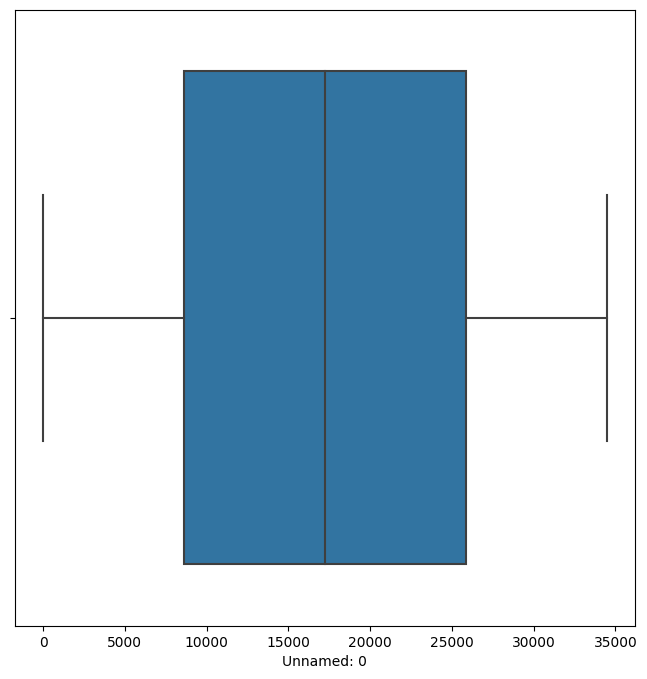

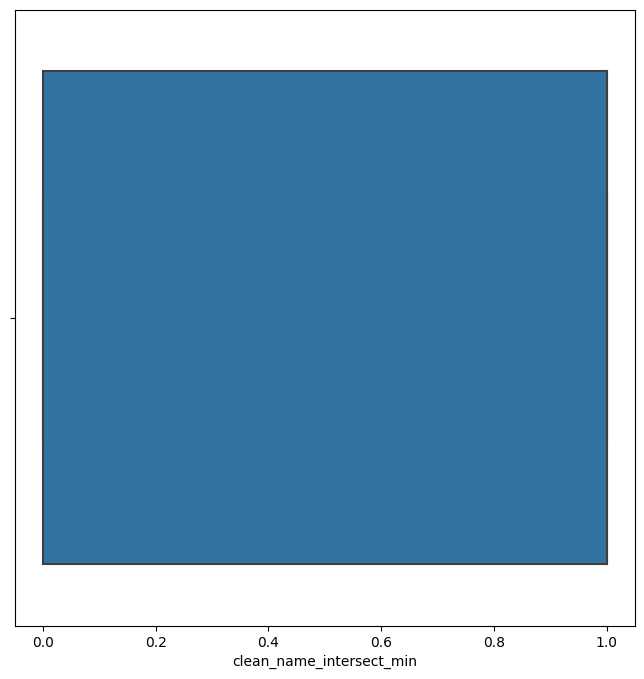

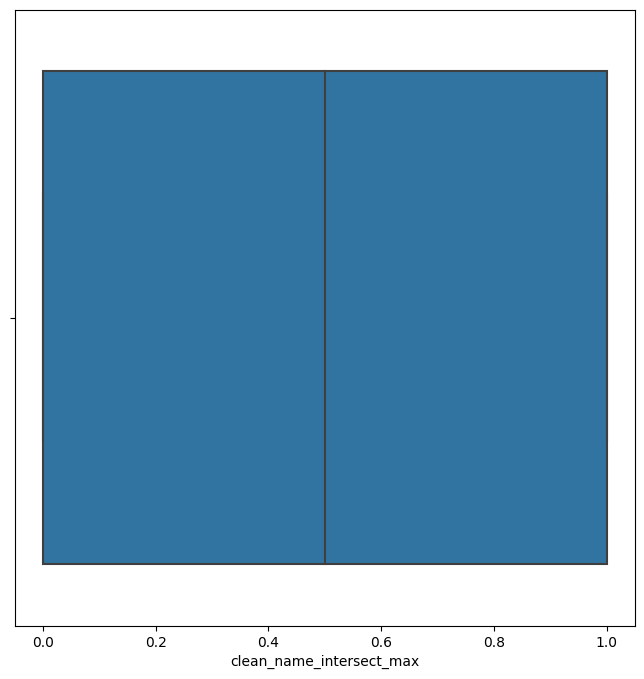

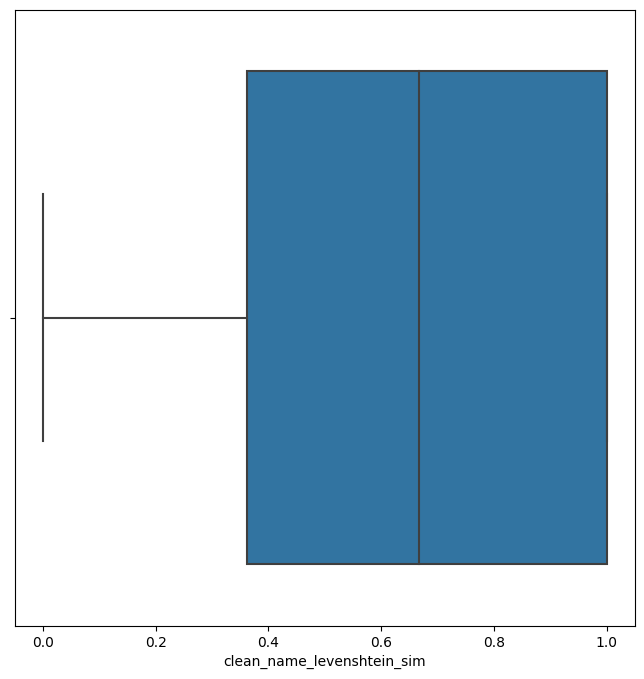

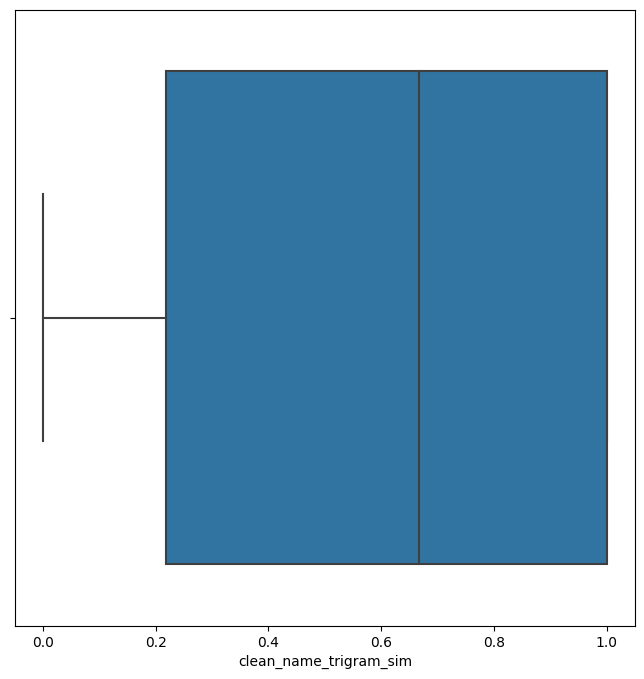

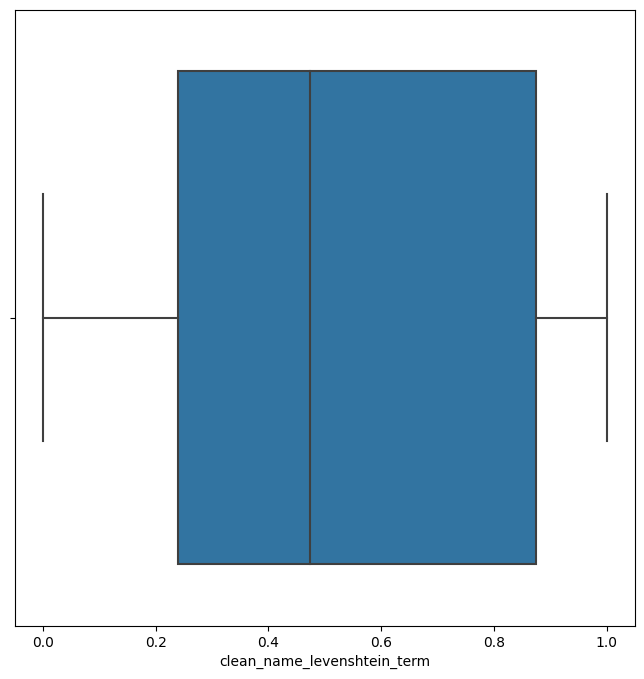

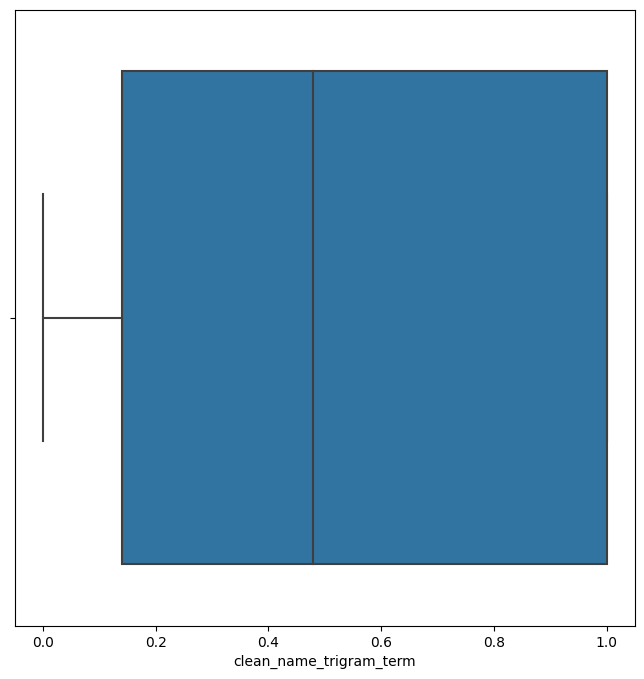

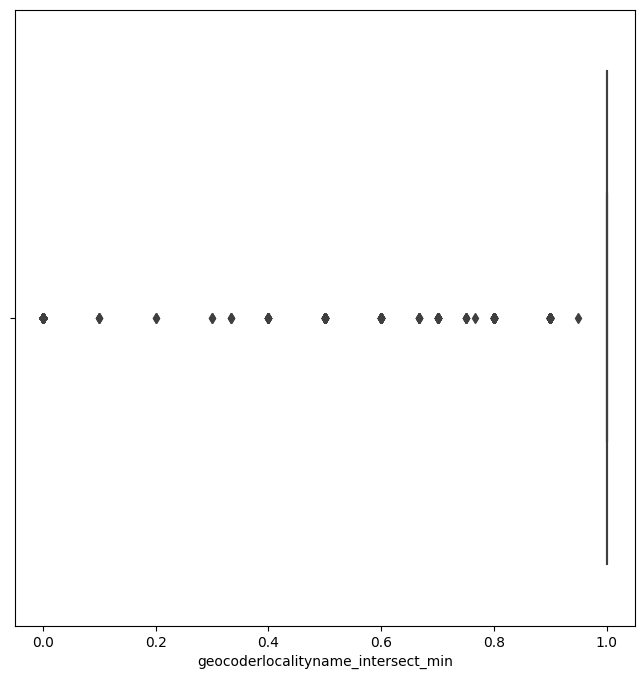

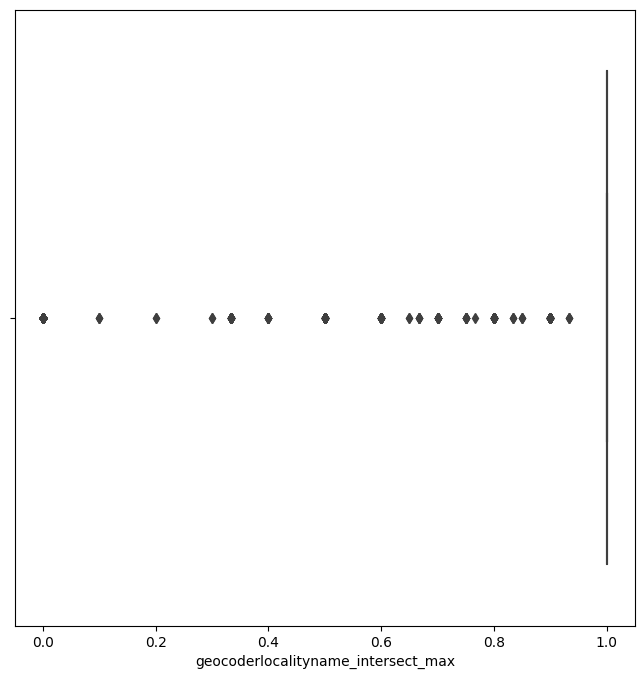

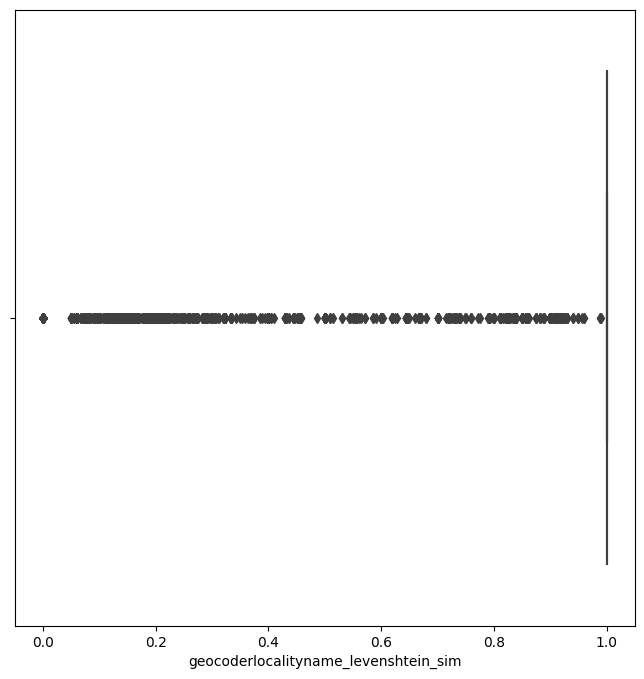

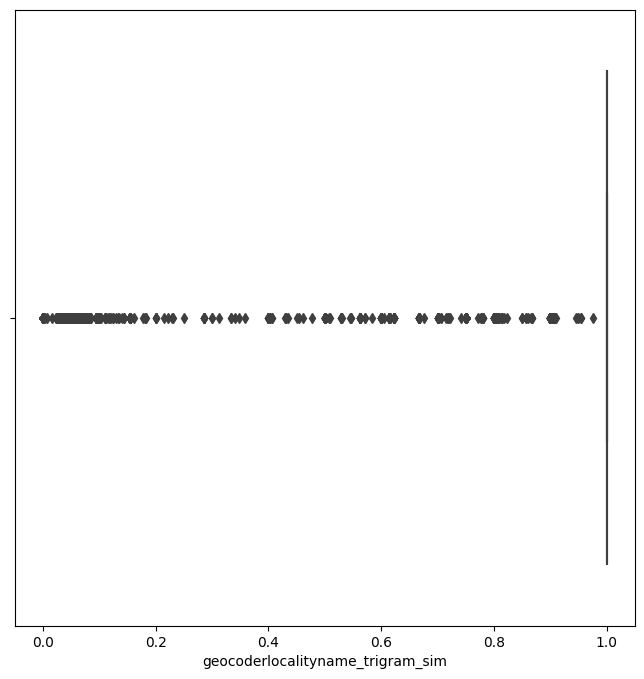

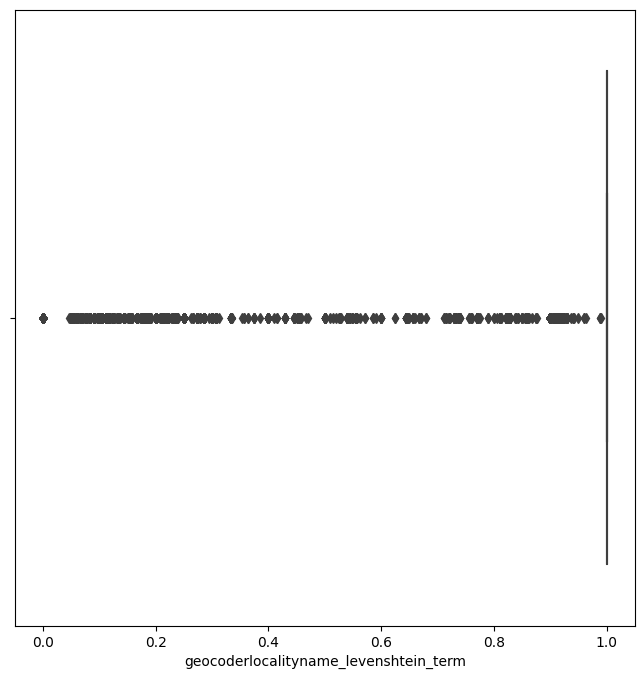

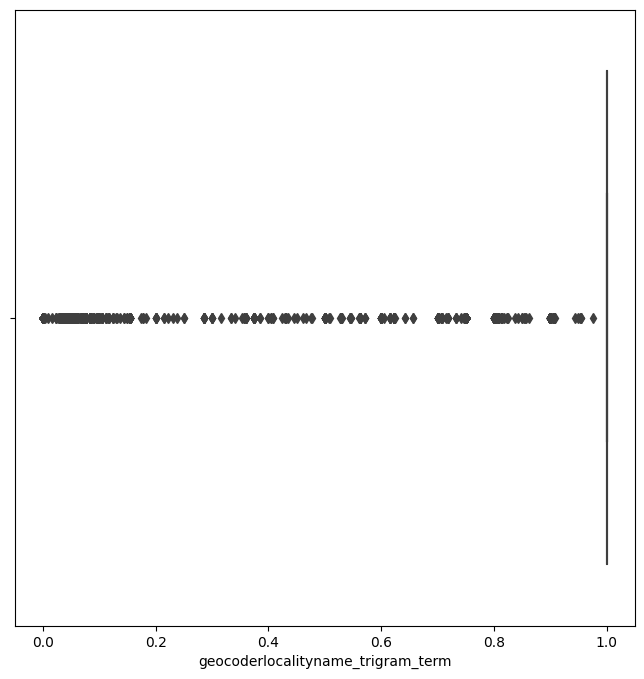

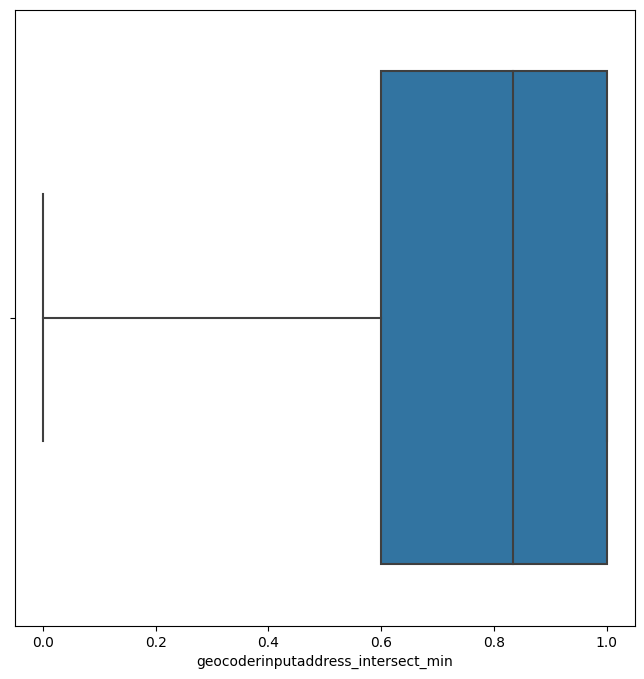

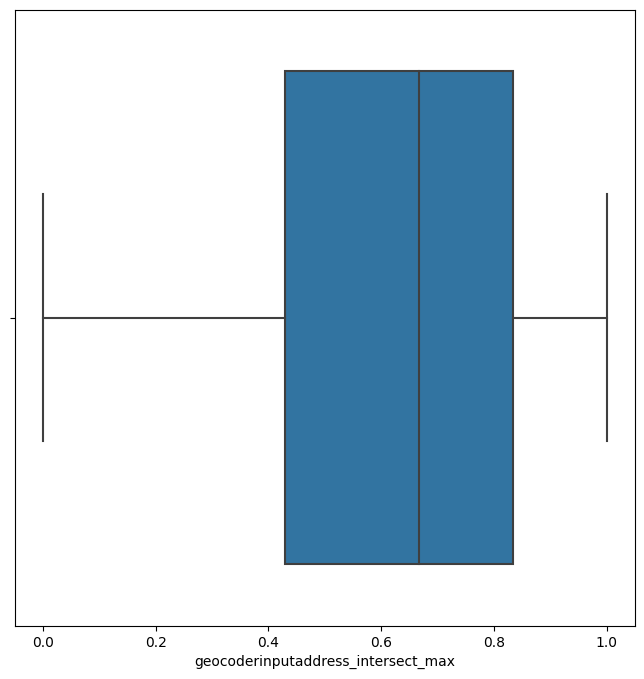

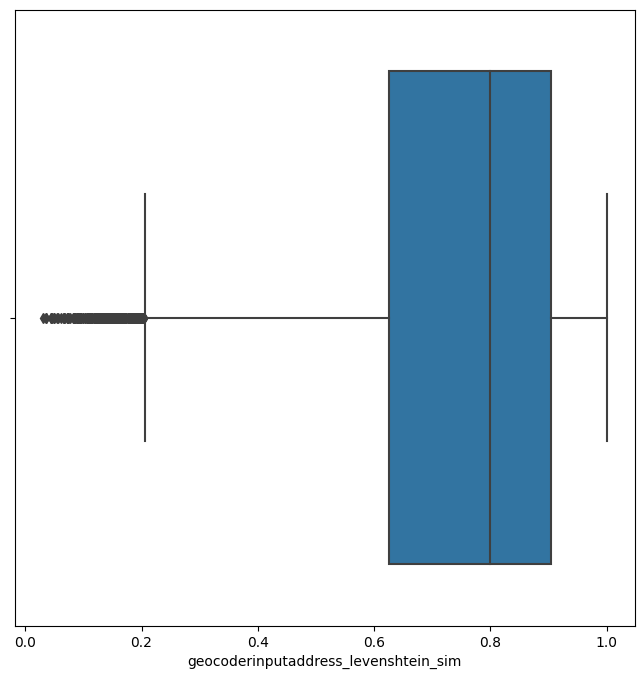

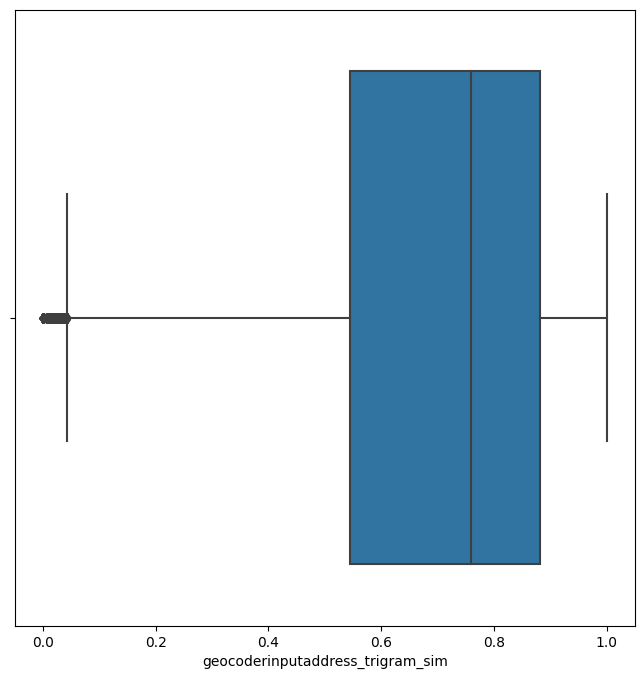

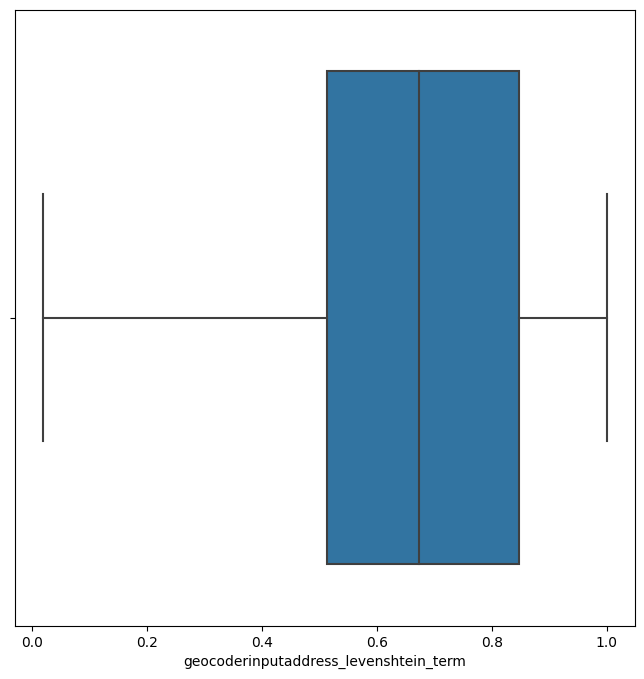

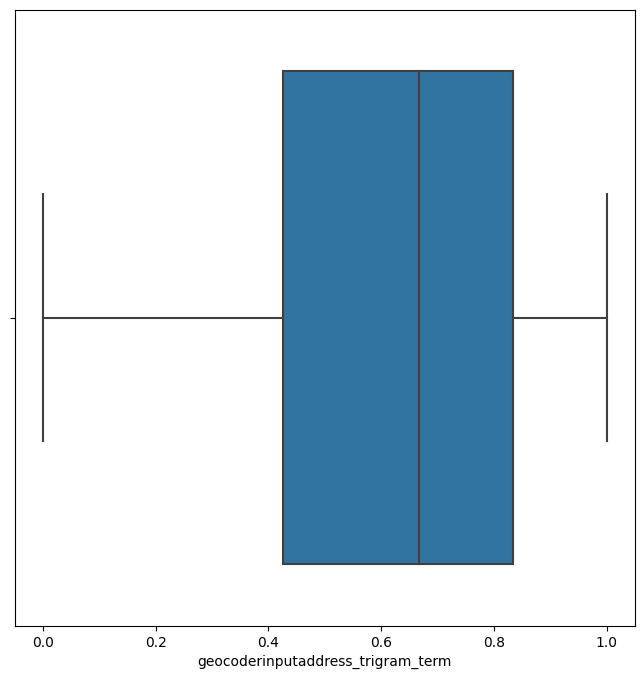

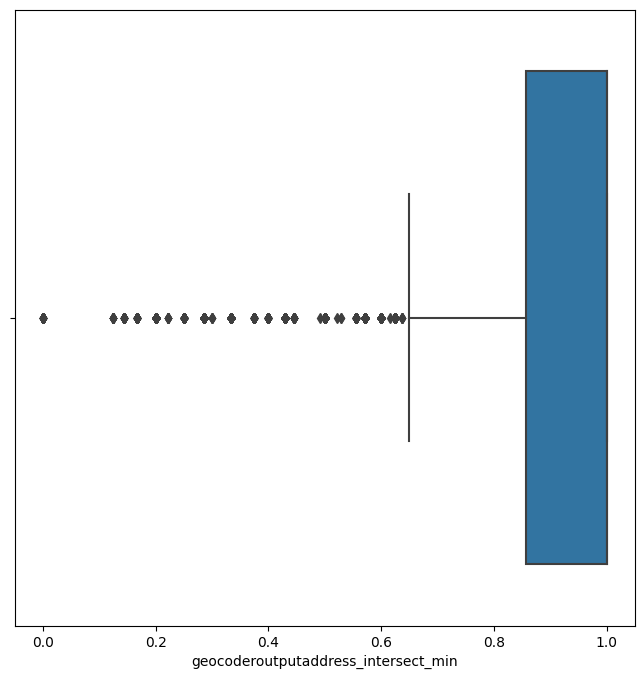

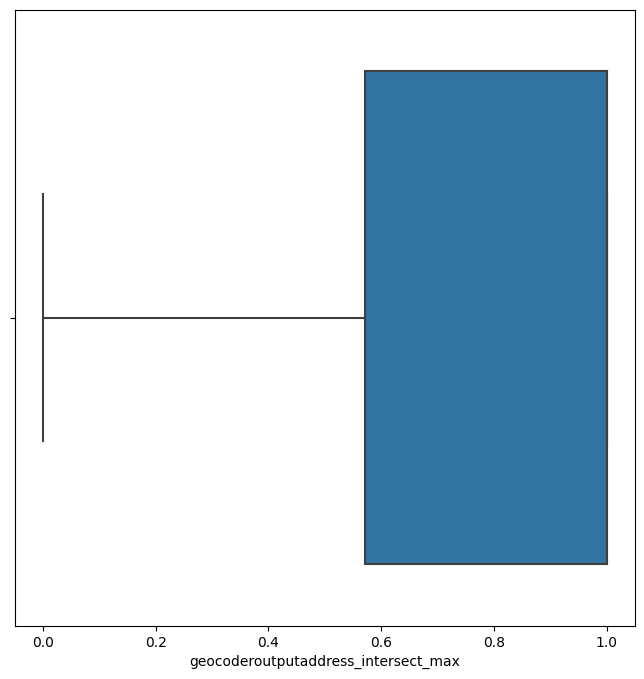

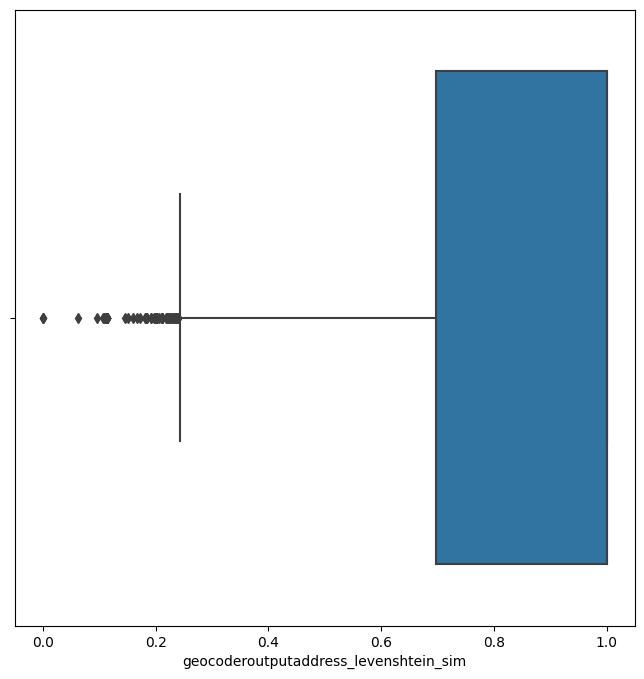

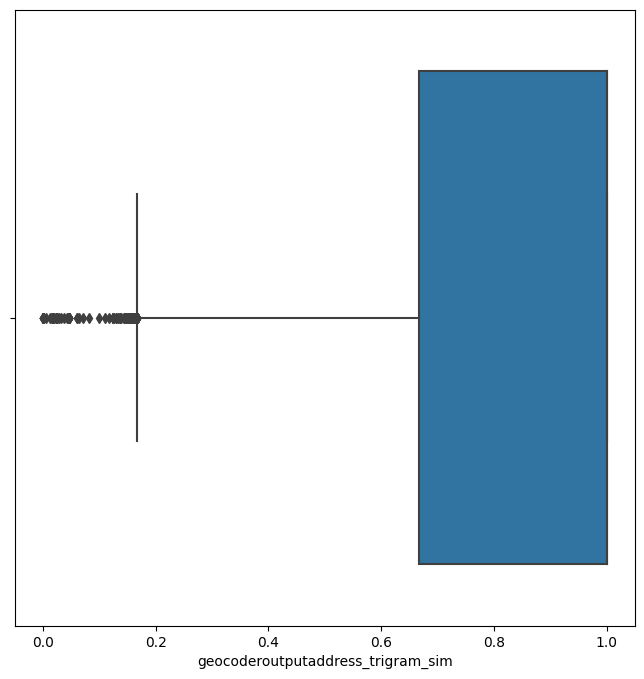

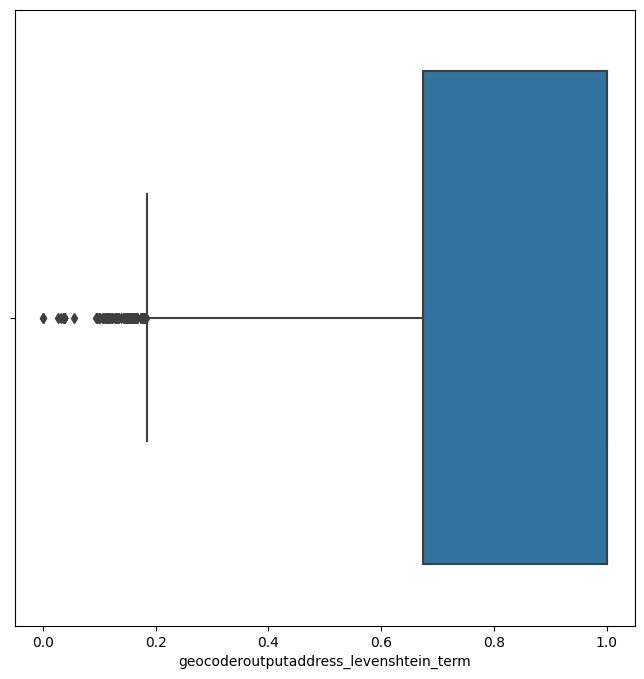

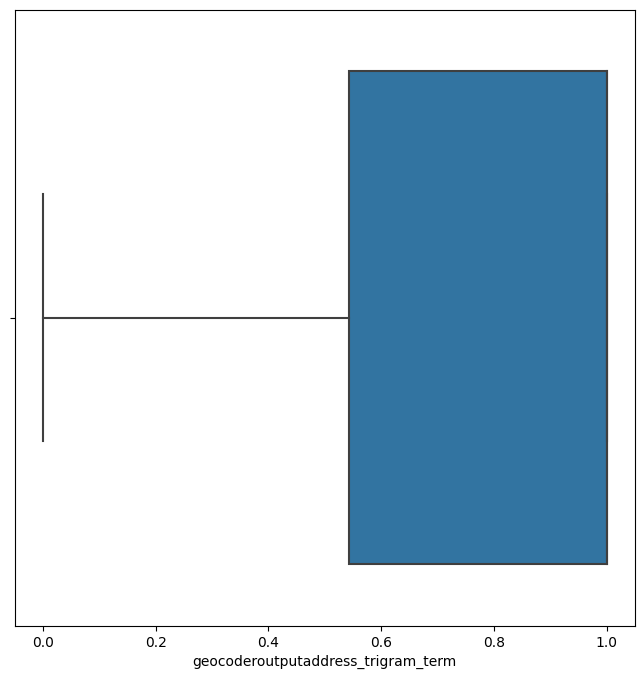

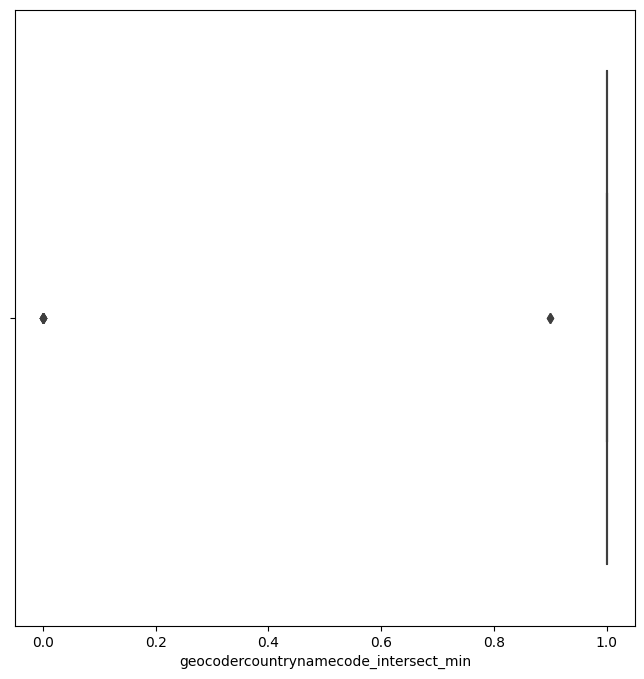

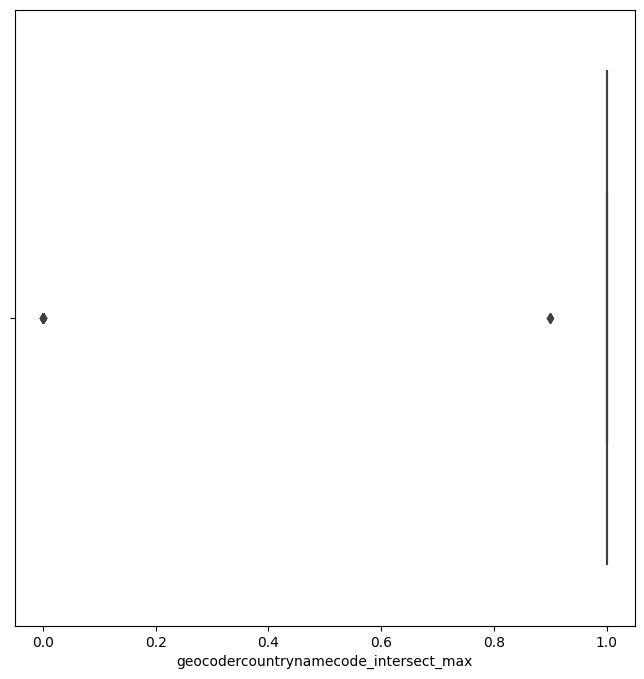

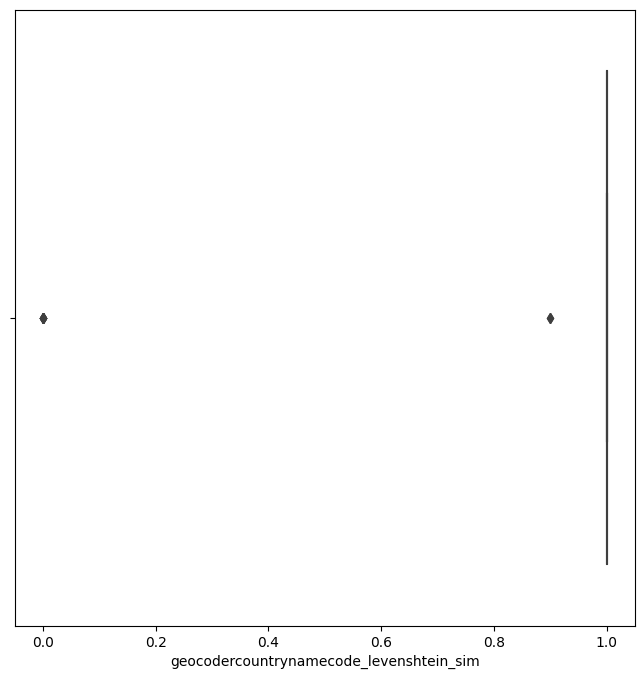

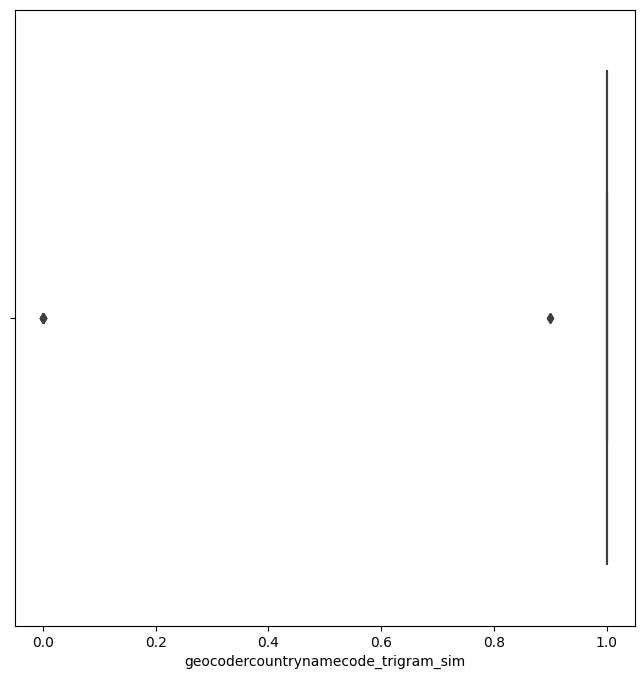

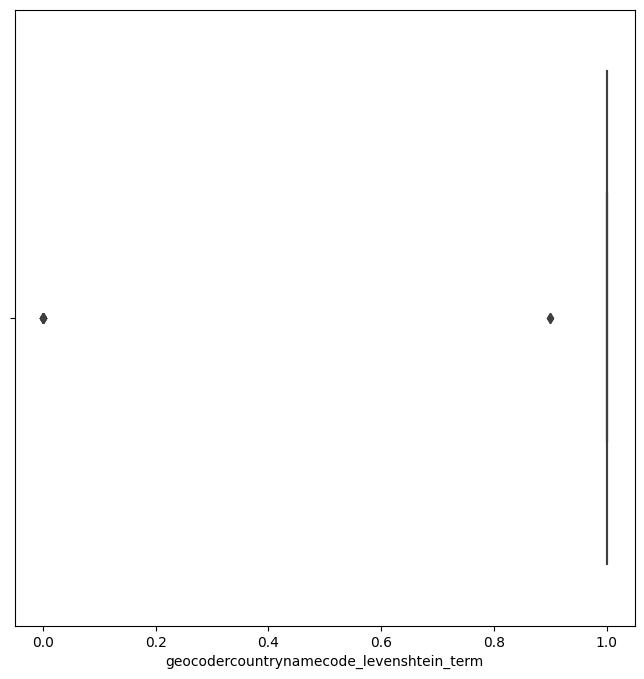

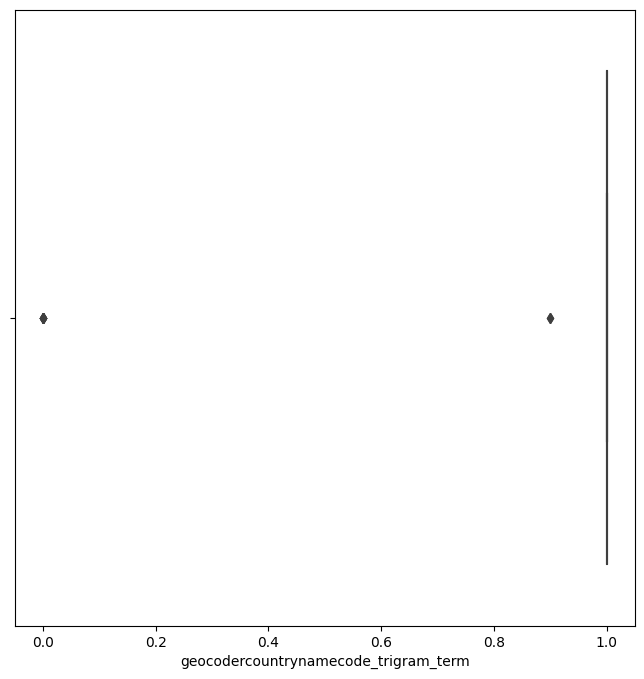

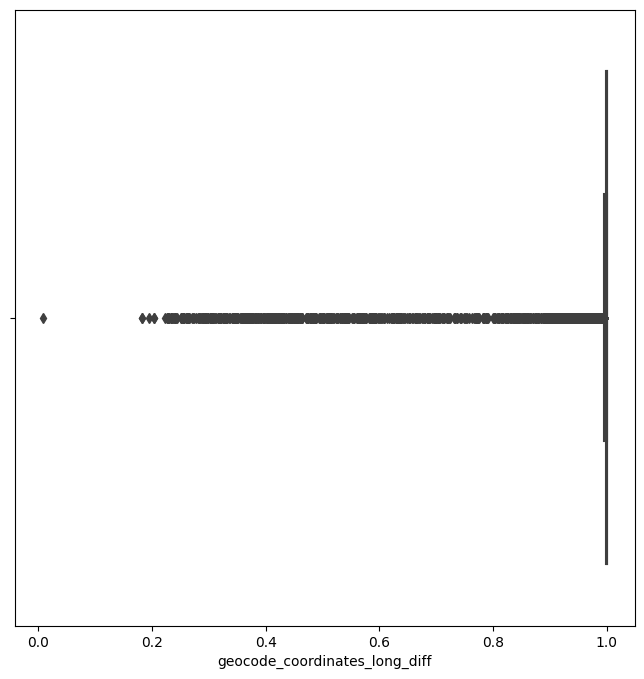

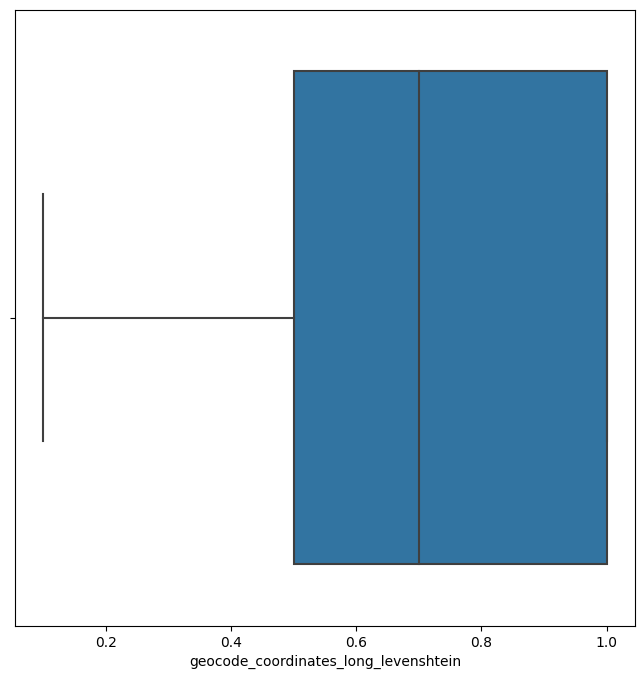

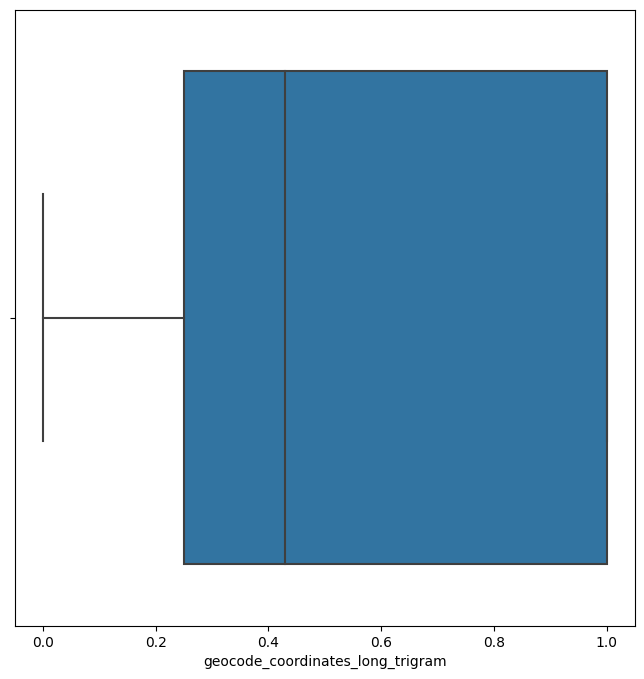

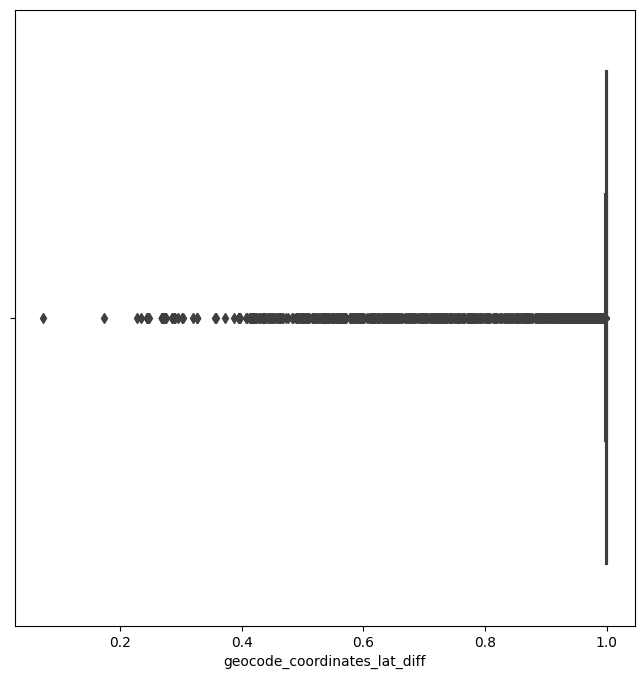

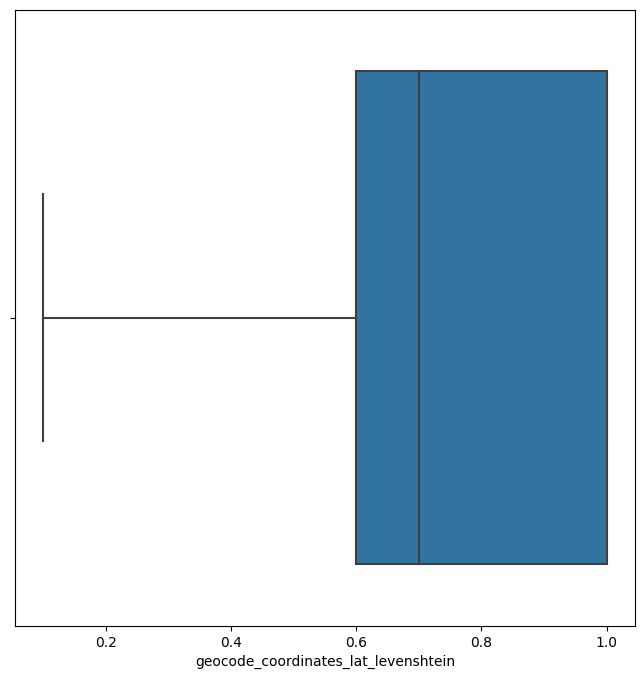

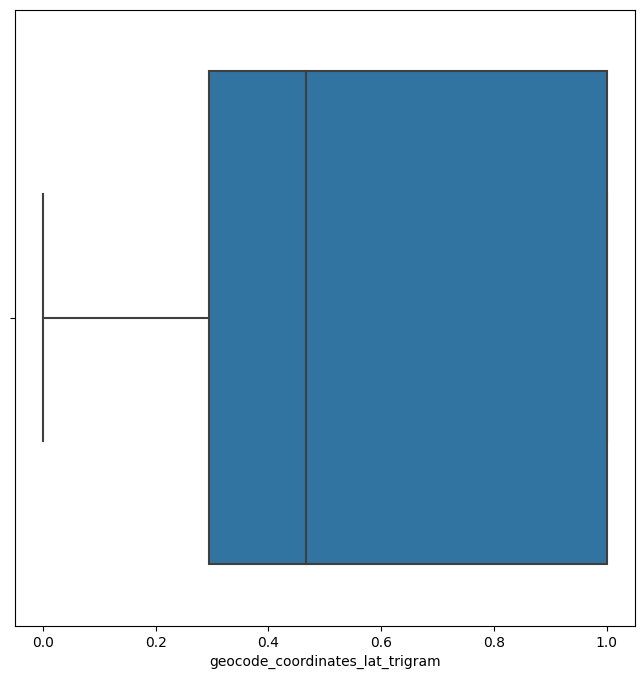

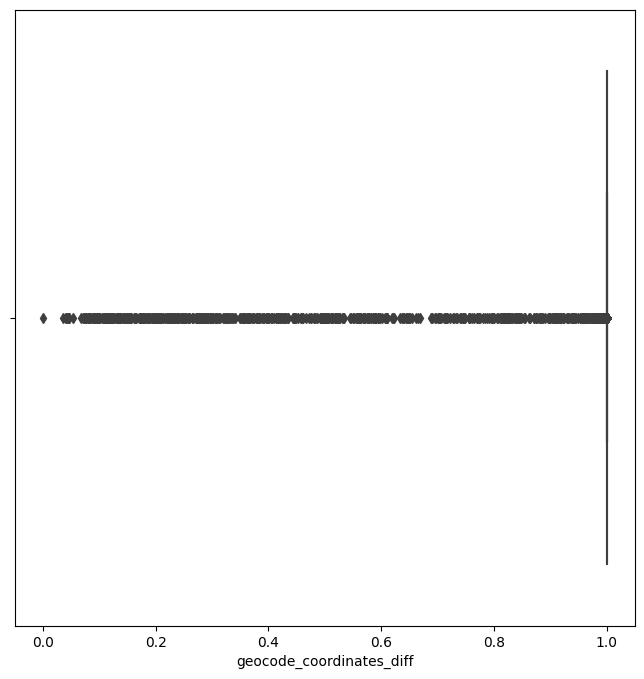

In [21]:
#Plotting box-plots

for i in numeric_attr[:-1]:
  fig, ax = plt.subplots(1, 1, figsize=(8,8))
  sns.boxplot(data=imp_data, x = i)

# sns.boxplot(data=imp_data, x = numeric_attr[5])

In [22]:
outlier_indices = []

for i in numeric_attr[:-1]:
  q1 = imp_data[i].quantile(0.25)
  q3 = imp_data[i].quantile(0.75)
  iqr = q3-q1

  filter = (imp_data.loc[:,i] <= (q1-1.5*iqr)) | (imp_data.loc[:, i] >= (q3+1.5*iqr))
  print(f"No. of outliers for {i} are {filter.sum()}")
  outlier_indices.append(filter)


No. of outliers for Unnamed: 0 are 0
No. of outliers for clean_name_intersect_min are 0
No. of outliers for clean_name_intersect_max are 0
No. of outliers for clean_name_levenshtein_sim are 0
No. of outliers for clean_name_trigram_sim are 0
No. of outliers for clean_name_levenshtein_term are 0
No. of outliers for clean_name_trigram_term are 0
No. of outliers for geocoderlocalityname_intersect_min are 34465
No. of outliers for geocoderlocalityname_intersect_max are 34465
No. of outliers for geocoderlocalityname_levenshtein_sim are 34465
No. of outliers for geocoderlocalityname_trigram_sim are 34465
No. of outliers for geocoderlocalityname_levenshtein_term are 34465
No. of outliers for geocoderlocalityname_trigram_term are 34465
No. of outliers for geocoderinputaddress_intersect_min are 0
No. of outliers for geocoderinputaddress_intersect_max are 0
No. of outliers for geocoderinputaddress_levenshtein_sim are 292
No. of outliers for geocoderinputaddress_trigram_sim are 360
No. of outliers

In [23]:
for i in numeric_attr[:-1]:
  print(f"The (min, max) value for {i} is ({imp_data[i].min()}, {imp_data[i].max()})")

The (min, max) value for Unnamed: 0 is (0.0, 34464.0)
The (min, max) value for clean_name_intersect_min is (0.0, 1.0)
The (min, max) value for clean_name_intersect_max is (0.0, 1.0)
The (min, max) value for clean_name_levenshtein_sim is (0.0, 1.0)
The (min, max) value for clean_name_trigram_sim is (0.0, 1.0)
The (min, max) value for clean_name_levenshtein_term is (0.0, 1.0)
The (min, max) value for clean_name_trigram_term is (0.0, 1.0)
The (min, max) value for geocoderlocalityname_intersect_min is (0.0, 1.0)
The (min, max) value for geocoderlocalityname_intersect_max is (0.0, 1.0)
The (min, max) value for geocoderlocalityname_levenshtein_sim is (0.0, 1.0)
The (min, max) value for geocoderlocalityname_trigram_sim is (0.0, 1.0)
The (min, max) value for geocoderlocalityname_levenshtein_term is (0.0, 1.0)
The (min, max) value for geocoderlocalityname_trigram_term is (0.0, 1.0)
The (min, max) value for geocoderinputaddress_intersect_min is (0.0, 1.0)
The (min, max) value for geocoderinputad

All the attributes are similarity measures between two places and the values they take are in the range of (0, 1) which is a valid range for similarity measures, so the values that the attributes take are valid and hence we will not remove any values.

Feature correlation

Plotting pairwise scatterplot

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='clean_name_levenshtein_sim', ylabel='geocoderlocalityname_levenshtein_sim'>

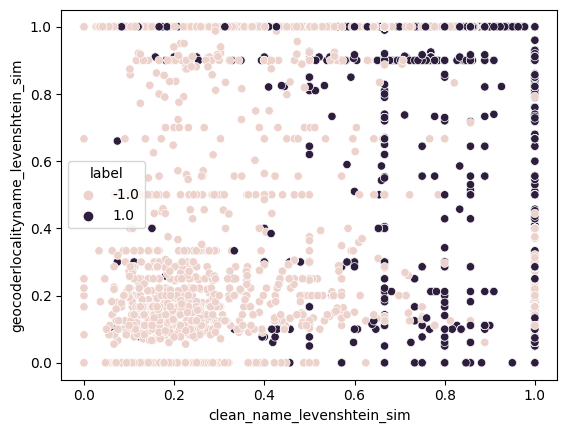

In [24]:
sns.scatterplot(data=imp_data, x='clean_name_levenshtein_sim', y='geocoderlocalityname_levenshtein_sim', hue='label')

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='clean_name_levenshtein_sim', ylabel='geocoderinputaddress_levenshtein_sim'>

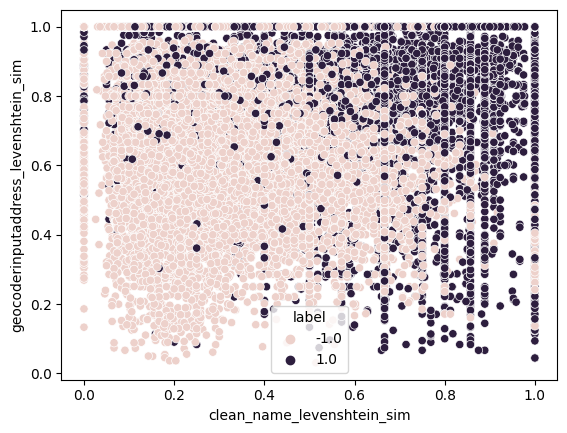

In [25]:
sns.scatterplot(data=imp_data, x='clean_name_levenshtein_sim', y='geocoderinputaddress_levenshtein_sim', hue='label')

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='clean_name_levenshtein_sim', ylabel='geocoderoutputaddress_levenshtein_sim'>

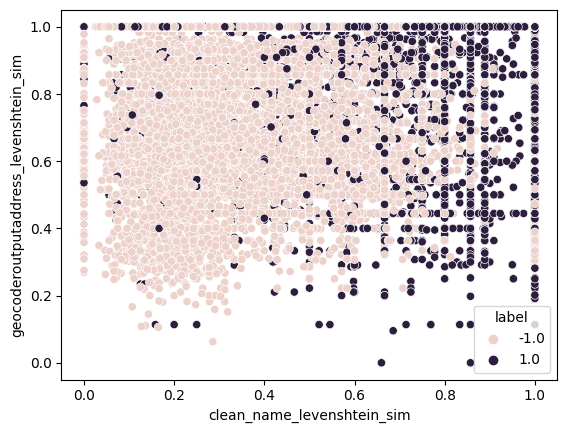

In [26]:
sns.scatterplot(data=imp_data, x='clean_name_levenshtein_sim', y='geocoderoutputaddress_levenshtein_sim', hue='label')

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='clean_name_levenshtein_sim', ylabel='clean_name_levenshtein_term'>

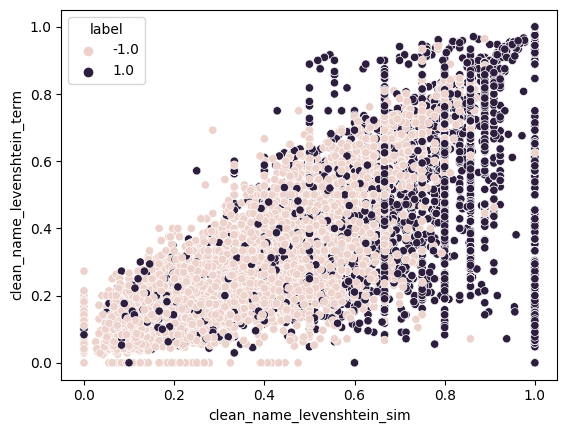

In [27]:
sns.scatterplot(data=imp_data, x='clean_name_levenshtein_sim', y='clean_name_levenshtein_term', hue='label')

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='clean_name_levenshtein_sim', ylabel='geocodercountrynamecode_levenshtein_sim'>

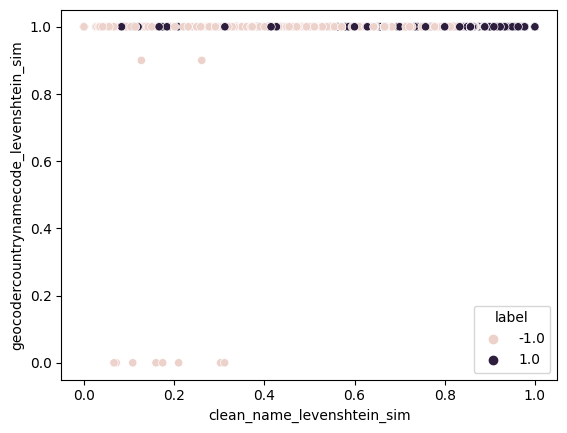

In [28]:
sns.scatterplot(data=imp_data, x='clean_name_levenshtein_sim', y='geocodercountrynamecode_levenshtein_sim', hue='label')

As the data is not normally distributed we use a non-parametric correlation - kendall correlation.

<Axes: >

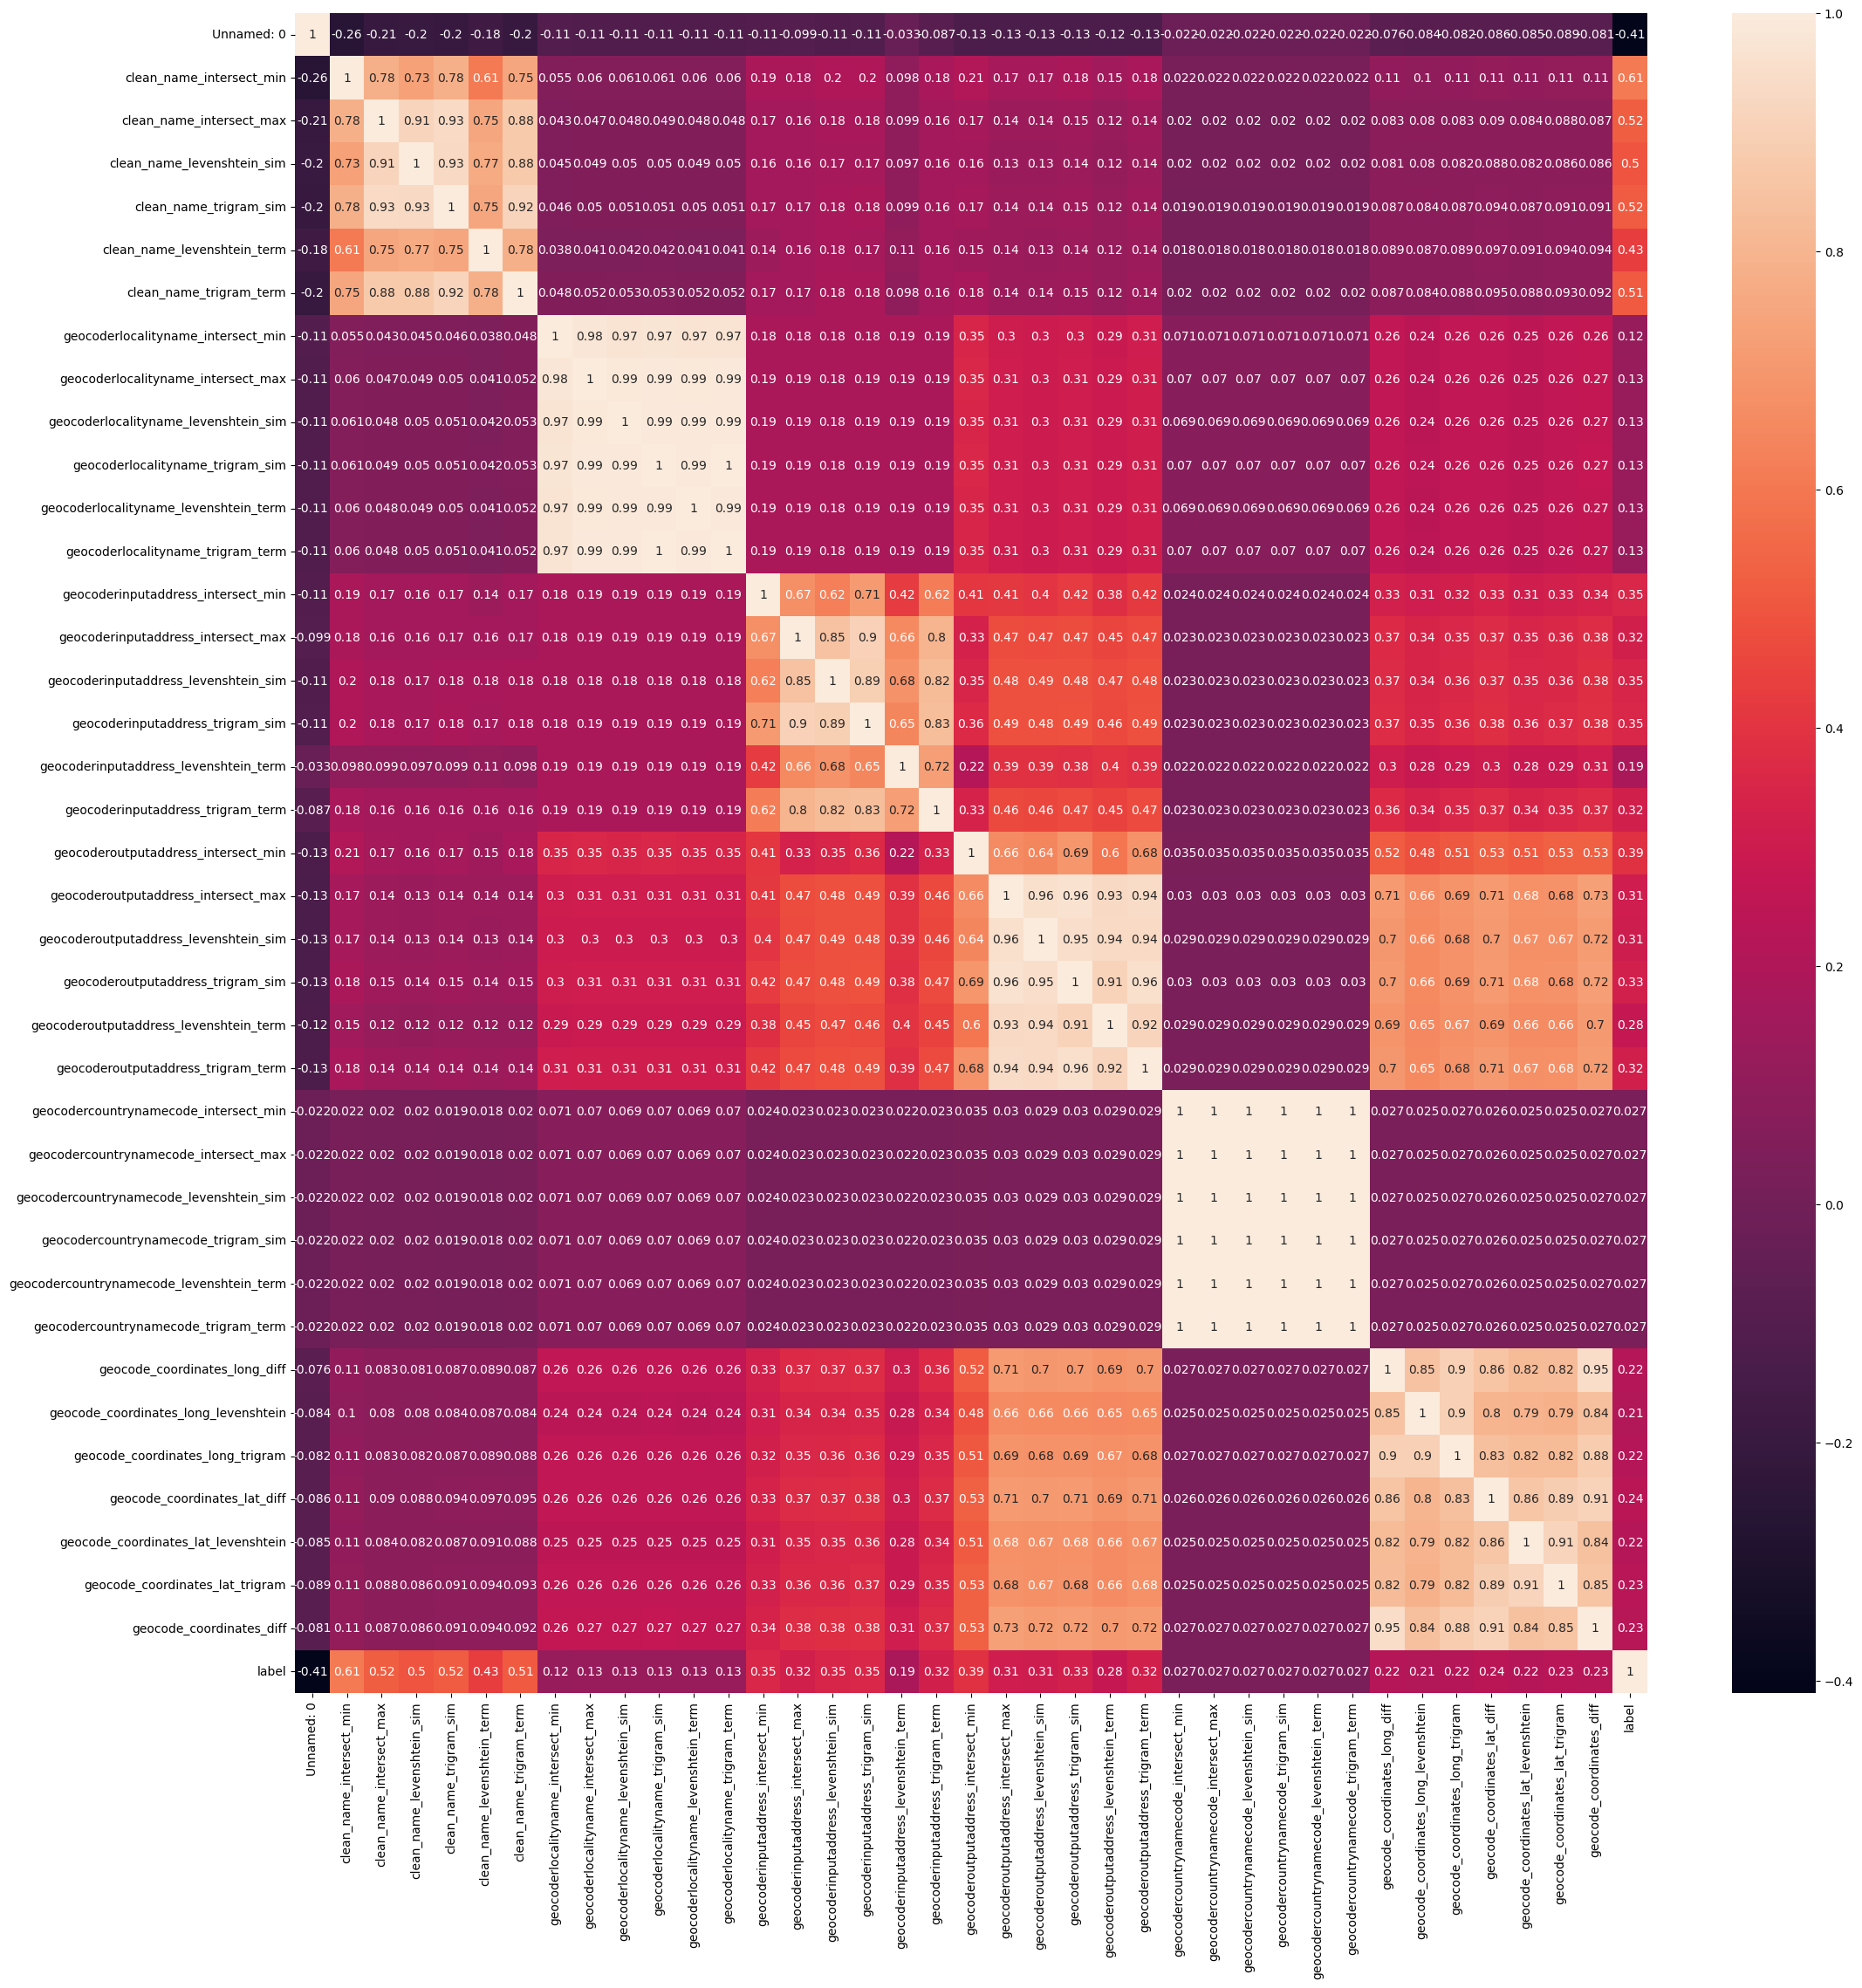

In [29]:
# Using Kendall correlation as data is not normally distributed

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(imp_data.corr(method='kendall', numeric_only=True), annot=True, ax=ax)

Using the correlations from the heatmap we remove the highly correlated features.

In [30]:
numeric_attr_kept = [numeric_attr[1], numeric_attr[2], numeric_attr[4], numeric_attr[8], numeric_attr[12], numeric_attr[14], numeric_attr[15], numeric_attr[16], numeric_attr[18], numeric_attr[20], numeric_attr[21], numeric_attr[26], numeric_attr[27], numeric_attr[31], numeric_attr[34], numeric_attr[-2], numeric_attr[-1]]
numeric_attr_kept

['clean_name_intersect_min',
 'clean_name_intersect_max',
 'clean_name_trigram_sim',
 'geocoderlocalityname_intersect_max',
 'geocoderlocalityname_trigram_term',
 'geocoderinputaddress_intersect_max',
 'geocoderinputaddress_levenshtein_sim',
 'geocoderinputaddress_trigram_sim',
 'geocoderinputaddress_trigram_term',
 'geocoderoutputaddress_intersect_max',
 'geocoderoutputaddress_levenshtein_sim',
 'geocodercountrynamecode_intersect_max',
 'geocodercountrynamecode_levenshtein_sim',
 'geocode_coordinates_long_diff',
 'geocode_coordinates_lat_diff',
 'geocode_coordinates_diff',
 'label']

In [31]:
categorical_attr

Index(['clean_name_including', 'clean_name_equality', 'city_including',
       'city_equality', 'zip_including', 'zip_equality', 'street_including',
       'street_equality', 'website_including', 'website_equality',
       'countryname_including', 'countryname_equality',
       'geocoderlocalityname_including', 'geocoderlocalityname_equality',
       'geocoderinputaddress_including', 'geocoderinputaddress_equality',
       'geocoderoutputaddress_including', 'geocoderoutputaddress_equality',
       'geocoderpostalcodenumber_including',
       'geocoderpostalcodenumber_equality',
       'geocodercountrynamecode_including', 'geocodercountrynamecode_equality',
       'phone_equality', 'fax_equality', 'street_number_equality',
       'geocode_coordinates_long_equality', 'geocode_coordinates_lat_equality',
       'coordinates_long_equality', 'coordinates_lat_equality'],
      dtype='object')

In [32]:
len(numeric_attr_kept)

17

In [33]:
# Feature selected dataset

fe_data = imp_data.loc[:, list(numeric_attr_kept)+list(categorical_attr)]
fe_data

,clean_name_intersect_min,clean_name_intersect_max,clean_name_trigram_sim,geocoderlocalityname_intersect_max,geocoderlocalityname_trigram_term,geocoderinputaddress_intersect_max,geocoderinputaddress_levenshtein_sim,geocoderinputaddress_trigram_sim,geocoderinputaddress_trigram_term,geocoderoutputaddress_intersect_max,...,geocoderpostalcodenumber_equality,geocodercountrynamecode_including,geocodercountrynamecode_equality,phone_equality,fax_equality,street_number_equality,geocode_coordinates_long_equality,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality
0,1.000000,1.000000,1.000000,1.0,1.000000,0.714286,0.846154,0.800000,0.731707,1.000000,...,s,s,s,m,m,s,s,s,n,n
1,1.000000,0.750000,0.857143,1.0,1.000000,0.714286,0.846154,0.800000,0.810811,1.000000,...,s,s,s,m,m,s,s,s,n,n
2,1.000000,1.000000,1.000000,1.0,1.000000,0.833333,0.916667,0.866667,0.882353,1.000000,...,s,s,s,m,m,s,s,s,n,n
3,1.000000,0.750000,0.857143,1.0,1.000000,0.571429,0.791667,0.761752,0.781250,1.000000,...,s,s,s,n,m,s,n,n,n,n
4,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,s,s,s,s,m,n,s,s,m,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.352941,0.0,0.071429,0.166667,0.321212,0.202020,0.059701,0.166667,...,n,s,s,n,m,n,n,n,n,n
34461,0.000000,0.000000,0.000000,1.0,1.000000,0.600000,0.666667,0.666667,0.666667,0.714286,...,s,s,s,m,m,n,n,n,n,n
34462,0.000000,0.000000,0.037037,1.0,1.000000,0.800000,0.800000,0.800000,0.659091,1.000000,...,s,s,s,s,s,n,s,s,m,m
34463,0.500000,0.200000,0.309524,0.0,0.050000,0.400000,0.625000,0.519231,0.382353,0.500000,...,s,s,s,s,m,n,n,n,m,m


In [34]:
fe_data.to_csv('fe_data.csv')

In [35]:
fe_data = pd.read_csv('fe_data.csv', index_col=0)
fe_data

,clean_name_intersect_min,clean_name_intersect_max,clean_name_trigram_sim,geocoderlocalityname_intersect_max,geocoderlocalityname_trigram_term,geocoderinputaddress_intersect_max,geocoderinputaddress_levenshtein_sim,geocoderinputaddress_trigram_sim,geocoderinputaddress_trigram_term,geocoderoutputaddress_intersect_max,...,geocoderpostalcodenumber_equality,geocodercountrynamecode_including,geocodercountrynamecode_equality,phone_equality,fax_equality,street_number_equality,geocode_coordinates_long_equality,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality
0,1.000000,1.000000,1.000000,1.0,1.000000,0.714286,0.846154,0.800000,0.731707,1.000000,...,s,s,s,m,m,s,s,s,n,n
1,1.000000,0.750000,0.857143,1.0,1.000000,0.714286,0.846154,0.800000,0.810811,1.000000,...,s,s,s,m,m,s,s,s,n,n
2,1.000000,1.000000,1.000000,1.0,1.000000,0.833333,0.916667,0.866667,0.882353,1.000000,...,s,s,s,m,m,s,s,s,n,n
3,1.000000,0.750000,0.857143,1.0,1.000000,0.571429,0.791667,0.761752,0.781250,1.000000,...,s,s,s,n,m,s,n,n,n,n
4,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,s,s,s,s,m,n,s,s,m,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.352941,0.0,0.071429,0.166667,0.321212,0.202020,0.059701,0.166667,...,n,s,s,n,m,n,n,n,n,n
34461,0.000000,0.000000,0.000000,1.0,1.000000,0.600000,0.666667,0.666667,0.666667,0.714286,...,s,s,s,m,m,n,n,n,n,n
34462,0.000000,0.000000,0.037037,1.0,1.000000,0.800000,0.800000,0.800000,0.659091,1.000000,...,s,s,s,s,s,n,s,s,m,m
34463,0.500000,0.200000,0.309524,0.0,0.050000,0.400000,0.625000,0.519231,0.382353,0.500000,...,s,s,s,s,m,n,n,n,m,m


In [36]:
fe_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34465 entries, 0 to 34464
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   clean_name_intersect_min                 34465 non-null  float64
 1   clean_name_intersect_max                 34465 non-null  float64
 2   clean_name_trigram_sim                   34465 non-null  float64
 3   geocoderlocalityname_intersect_max       34465 non-null  float64
 4   geocoderlocalityname_trigram_term        34465 non-null  float64
 5   geocoderinputaddress_intersect_max       34465 non-null  float64
 6   geocoderinputaddress_levenshtein_sim     34465 non-null  float64
 7   geocoderinputaddress_trigram_sim         34465 non-null  float64
 8   geocoderinputaddress_trigram_term        34465 non-null  float64
 9   geocoderoutputaddress_intersect_max      34465 non-null  float64
 10  geocoderoutputaddress_levenshtein_sim    34465 non-

In [37]:
fe_data.describe()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_trigram_sim,geocoderlocalityname_intersect_max,geocoderlocalityname_trigram_term,geocoderinputaddress_intersect_max,geocoderinputaddress_levenshtein_sim,geocoderinputaddress_trigram_sim,geocoderinputaddress_trigram_term,geocoderoutputaddress_intersect_max,geocoderoutputaddress_levenshtein_sim,geocodercountrynamecode_intersect_max,geocodercountrynamecode_levenshtein_sim,geocode_coordinates_long_diff,geocode_coordinates_lat_diff,geocode_coordinates_diff,label
count,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000,34465.000000
mean,0.636477,0.494806,0.560947,0.949709,0.955486,0.615906,0.748632,0.696702,0.625115,0.797751,0.857977,0.999762,0.999762,0.987217,0.990934,0.988831,0.428754
std,0.424382,0.380142,0.369695,0.213970,0.196519,0.254352,0.193227,0.235302,0.257319,0.280669,0.203650,0.015253,0.015253,0.069840,0.056104,0.086647,0.903434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008007,0.073069,0.000064,-1.000000
25%,0.000000,0.000000,0.218750,1.000000,1.000000,0.428571,0.625000,0.545455,0.425000,0.571429,0.696429,1.000000,1.000000,0.998371,0.998952,0.999992,-1.000000
50%,1.000000,0.500000,0.666667,1.000000,1.000000,0.666667,0.800000,0.758772,0.666667,1.000000,1.000000,1.000000,1.000000,0.999970,0.999978,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.904762,0.880952,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Hypothesis Testing**

In [38]:
imp_numeric_attr = imp_data.select_dtypes(np.float64).columns
imp_numeric_attr

Index(['Unnamed: 0', 'clean_name_intersect_min', 'clean_name_intersect_max',
       'clean_name_levenshtein_sim', 'clean_name_trigram_sim',
       'clean_name_levenshtein_term', 'clean_name_trigram_term',
       'geocoderlocalityname_intersect_min',
       'geocoderlocalityname_intersect_max',
       'geocoderlocalityname_levenshtein_sim',
       'geocoderlocalityname_trigram_sim',
       'geocoderlocalityname_levenshtein_term',
       'geocoderlocalityname_trigram_term',
       'geocoderinputaddress_intersect_min',
       'geocoderinputaddress_intersect_max',
       'geocoderinputaddress_levenshtein_sim',
       'geocoderinputaddress_trigram_sim',
       'geocoderinputaddress_levenshtein_term',
       'geocoderinputaddress_trigram_term',
       'geocoderoutputaddress_intersect_min',
       'geocoderoutputaddress_intersect_max',
       'geocoderoutputaddress_levenshtein_sim',
       'geocoderoutputaddress_trigram_sim',
       'geocoderoutputaddress_levenshtein_term',
       'geocoderou

In [39]:
imp_categorical_attr = imp_data.select_dtypes(object).columns
imp_categorical_attr

Index(['clean_name_including', 'clean_name_equality', 'city_including',
       'city_equality', 'zip_including', 'zip_equality', 'street_including',
       'street_equality', 'website_including', 'website_equality',
       'countryname_including', 'countryname_equality',
       'geocoderlocalityname_including', 'geocoderlocalityname_equality',
       'geocoderinputaddress_including', 'geocoderinputaddress_equality',
       'geocoderoutputaddress_including', 'geocoderoutputaddress_equality',
       'geocoderpostalcodenumber_including',
       'geocoderpostalcodenumber_equality',
       'geocodercountrynamecode_including', 'geocodercountrynamecode_equality',
       'phone_equality', 'fax_equality', 'street_number_equality',
       'geocode_coordinates_long_equality', 'geocode_coordinates_lat_equality',
       'coordinates_long_equality', 'coordinates_lat_equality'],
      dtype='object')

C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ANJALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='geocode_coordinates_diff', ylabel='Count'>

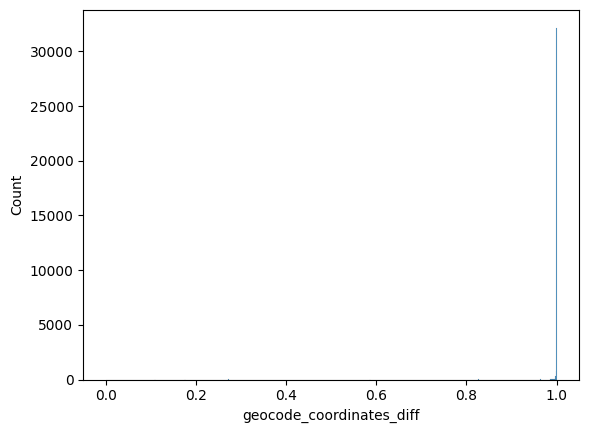

In [40]:
sns.histplot(data=imp_data, x='geocode_coordinates_diff', binwidth=0.001)

Train and test set

In [41]:
fe_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34465 entries, 0 to 34464
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   clean_name_intersect_min                 34465 non-null  float64
 1   clean_name_intersect_max                 34465 non-null  float64
 2   clean_name_trigram_sim                   34465 non-null  float64
 3   geocoderlocalityname_intersect_max       34465 non-null  float64
 4   geocoderlocalityname_trigram_term        34465 non-null  float64
 5   geocoderinputaddress_intersect_max       34465 non-null  float64
 6   geocoderinputaddress_levenshtein_sim     34465 non-null  float64
 7   geocoderinputaddress_trigram_sim         34465 non-null  float64
 8   geocoderinputaddress_trigram_term        34465 non-null  float64
 9   geocoderoutputaddress_intersect_max      34465 non-null  float64
 10  geocoderoutputaddress_levenshtein_sim    34465 non-

In [42]:
num_dataX = fe_data.select_dtypes(np.number)
num_dataX.drop(axis=1, columns=['label'], inplace = True)
num_dataX

,clean_name_intersect_min,clean_name_intersect_max,clean_name_trigram_sim,geocoderlocalityname_intersect_max,geocoderlocalityname_trigram_term,geocoderinputaddress_intersect_max,geocoderinputaddress_levenshtein_sim,geocoderinputaddress_trigram_sim,geocoderinputaddress_trigram_term,geocoderoutputaddress_intersect_max,geocoderoutputaddress_levenshtein_sim,geocodercountrynamecode_intersect_max,geocodercountrynamecode_levenshtein_sim,geocode_coordinates_long_diff,geocode_coordinates_lat_diff,geocode_coordinates_diff
0,1.000000,1.000000,1.000000,1.0,1.000000,0.714286,0.846154,0.800000,0.731707,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
1,1.000000,0.750000,0.857143,1.0,1.000000,0.714286,0.846154,0.800000,0.810811,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.0,1.000000,0.833333,0.916667,0.866667,0.882353,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
3,1.000000,0.750000,0.857143,1.0,1.000000,0.571429,0.791667,0.761752,0.781250,1.000000,1.000000,1.0,1.0,0.999774,0.999962,1.000000
4,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.352941,0.0,0.071429,0.166667,0.321212,0.202020,0.059701,0.166667,0.339394,1.0,1.0,0.998205,0.999826,0.999997
34461,0.000000,0.000000,0.000000,1.0,1.000000,0.600000,0.666667,0.666667,0.666667,0.714286,0.833145,1.0,1.0,0.999942,0.999747,1.000000
34462,0.000000,0.000000,0.037037,1.0,1.000000,0.800000,0.800000,0.800000,0.659091,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
34463,0.500000,0.200000,0.309524,0.0,0.050000,0.400000,0.625000,0.519231,0.382353,0.500000,0.701727,1.0,1.0,0.971352,0.999876,0.999131


In [43]:
num_dataY = fe_data['label']
num_dataY

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
34460   -1.0
34461   -1.0
34462    1.0
34463    1.0
34464   -1.0
Name: label, Length: 34465, dtype: float64

In [44]:
def helper_train_test_split(dataX, dataY, tsize, labels):
  ntrain_dataX, ntest_dataX, ntrain_dataY, ntest_dataY = train_test_split(dataX, dataY, test_size=tsize, stratify=labels)
  ntrain_dataX.index = range(len(ntrain_dataX))
  ntest_dataX.index = range(len(ntest_dataX))
  ntrain_dataY.index = range(len(ntrain_dataY))
  ntest_dataY.index = range(len(ntest_dataY))

  return ntrain_dataX, ntest_dataX, ntrain_dataY, ntest_dataY

In [45]:
ntrain_dataX, ntest_dataX, ntrain_dataY, ntest_dataY = helper_train_test_split(num_dataX, num_dataY, 0.2, num_dataY)

In [46]:
ntrain_dataX

,clean_name_intersect_min,clean_name_intersect_max,clean_name_trigram_sim,geocoderlocalityname_intersect_max,geocoderlocalityname_trigram_term,geocoderinputaddress_intersect_max,geocoderinputaddress_levenshtein_sim,geocoderinputaddress_trigram_sim,geocoderinputaddress_trigram_term,geocoderoutputaddress_intersect_max,geocoderoutputaddress_levenshtein_sim,geocodercountrynamecode_intersect_max,geocodercountrynamecode_levenshtein_sim,geocode_coordinates_long_diff,geocode_coordinates_lat_diff,geocode_coordinates_diff
0,0.500000,0.250000,0.333333,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.999754,0.999979,1.000000
1,0.666667,0.500000,0.571429,1.0,1.0,0.500000,0.531250,0.500000,0.315789,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
2,1.000000,0.250000,0.400000,1.0,1.0,0.666667,0.800000,0.800000,0.555556,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
3,1.000000,0.666667,0.800000,1.0,1.0,0.666667,0.808333,0.712037,0.592593,0.888889,0.944444,1.0,1.0,0.999896,0.999972,1.000000
4,0.250000,0.200000,0.249832,1.0,1.0,0.285714,0.533333,0.450000,0.416667,0.666667,0.800000,1.0,1.0,0.996538,0.997350,0.999981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27567,0.000000,0.000000,0.044444,1.0,1.0,0.333333,0.551111,0.433333,0.304348,0.500000,0.676768,1.0,1.0,0.999558,0.998990,0.999999
27568,0.600000,0.500000,0.568182,1.0,1.0,0.857143,0.857143,0.857143,0.552632,1.000000,1.000000,1.0,1.0,0.999994,0.999907,1.000000
27569,0.750000,0.600000,0.666667,1.0,1.0,0.333333,0.618707,0.555195,0.396226,0.500000,0.666667,1.0,1.0,0.984167,0.997303,0.999734
27570,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.999949,0.999948,1.000000


In [47]:
ntest_dataX

,clean_name_intersect_min,clean_name_intersect_max,clean_name_trigram_sim,geocoderlocalityname_intersect_max,geocoderlocalityname_trigram_term,geocoderinputaddress_intersect_max,geocoderinputaddress_levenshtein_sim,geocoderinputaddress_trigram_sim,geocoderinputaddress_trigram_term,geocoderoutputaddress_intersect_max,geocoderoutputaddress_levenshtein_sim,geocodercountrynamecode_intersect_max,geocodercountrynamecode_levenshtein_sim,geocode_coordinates_long_diff,geocode_coordinates_lat_diff,geocode_coordinates_diff
0,1.0,1.0,1.000000,1.0,1.0,0.833333,0.909091,0.909091,0.911765,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
1,0.0,0.0,0.084656,1.0,1.0,0.333333,0.679654,0.435065,0.367347,0.500000,0.692460,1.0,1.0,0.998686,0.998624,0.999996
2,0.0,0.0,0.035714,1.0,1.0,0.400000,0.638889,0.515625,0.295455,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
3,0.0,0.0,0.181818,1.0,1.0,0.500000,0.623810,0.571429,0.470588,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
4,1.0,1.0,1.000000,1.0,1.0,0.333333,0.469136,0.444444,0.384615,0.285714,0.477778,1.0,1.0,0.992864,0.980964,0.999572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,0.0,0.0,0.000000,1.0,1.0,0.428571,0.819444,0.622222,0.763158,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
6889,0.0,0.0,0.000000,1.0,1.0,0.333333,0.500000,0.400000,0.363636,0.571429,0.611905,1.0,1.0,0.998407,0.999745,0.999997
6890,1.0,1.0,1.000000,1.0,1.0,0.750000,0.859375,0.796131,0.829787,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
6891,1.0,1.0,1.000000,1.0,1.0,0.428571,0.677778,0.476190,0.288136,0.375000,0.647407,1.0,1.0,0.978835,0.984482,0.999284


In [48]:
ntrain_dataY.value_counts()

label
 1.0    19697
-1.0     7875
Name: count, dtype: int64

1. Naive Bayes Classifier

In [49]:
# Using a naive bayes classifier as a baseline model

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(ntrain_dataX, ntrain_dataY)

predictions = pd.DataFrame(clf.predict(ntest_dataX))
predict_proba = pd.DataFrame(clf.predict_proba(ntest_dataX), columns=['predict_proba_-1', 'predict_proba_1'])

print(f"The accuracy of the Naive Bayes classifier is: {clf.score(ntest_dataX, ntest_dataY)}")

The accuracy of the Naive Bayes classifier is: 0.728855360510663


In [50]:
print(f"The prediction probabilities are: ")
predict_proba

The prediction probabilities are: 


,predict_proba_-1,predict_proba_1
0,5.753661e-18,1.000000
1,1.268239e-04,0.999873
2,1.126907e-05,0.999989
3,9.746353e-07,0.999999
4,4.201837e-12,1.000000
...,...,...
6888,3.114635e-07,1.000000
6889,1.146511e-03,0.998853
6890,1.480246e-17,1.000000
6891,1.909436e-13,1.000000


In [51]:
predictions

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6888,1.0
6889,1.0
6890,1.0
6891,1.0


2. Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(ntrain_dataX, ntrain_dataY)

predictions = pd.DataFrame(dtc.predict(ntest_dataX))

print(f"The accuracy of the Decision Tree classifier is: {dtc.score(ntest_dataX, ntest_dataY)}")

The accuracy of the Decision Tree classifier is: 0.8462208037139126


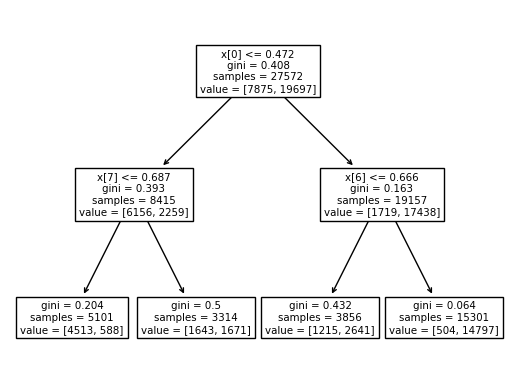

In [53]:
from sklearn.tree import plot_tree

plot_tree(dtc)
plt.show()

Feature: 0, Score: 0.47866
Feature: 1, Score: 0.00953
Feature: 2, Score: 0.05304
Feature: 3, Score: 0.00175
Feature: 4, Score: 0.00517
Feature: 5, Score: 0.02596
Feature: 6, Score: 0.08003
Feature: 7, Score: 0.08582
Feature: 8, Score: 0.06750
Feature: 9, Score: 0.02168
Feature: 10, Score: 0.06357
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03921
Feature: 14, Score: 0.04983
Feature: 15, Score: 0.01825


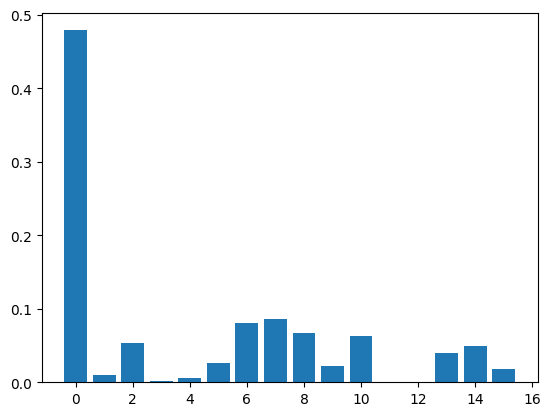

In [55]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
mc = DecisionTreeRegressor()
mc.fit(ntrain_dataX, ntrain_dataY)
importance = mc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()